In [1]:
import numpy as np
import pandas as pd
from nltk.classify import SklearnClassifier;
from wordcloud import WordCloud,STOPWORDS

from subprocess import check_output
import nltk

# Importing necessary libraries
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import warnings 
import unicodedata
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
all_reviews=pd.read_csv('allreviews.csv')

In [3]:
valid_reviews= pd.read_csv('valid_reviews.csv')

In [4]:
all_reviews

ASIN           ProductFlavor  \
0        B0021FEMZG               Chocolate   
1        B00I01ZXYE           Flavor_absent   
2        B0021FEMZG     Natural - No Stevia   
3        B00I01ZXYE           Flavor_absent   
4        B083SFBKPT           Flavor_absent   
...             ...                     ...   
1048570  B007LAHS2K           Flavor_absent   
1048571  B07SBF1WDX           Flavor_absent   
1048572  B01L1YXQEU                  Silver   
1048573  B07FTTGM6N  Blackberry Pomegranate   
1048574  B00UMPBD2C           Flavor_absent   

                                               ProductName  ProductNumReviews  \
0        PlantFusion Complete Plant Based Pea Protein P...               4762   
1        ONE ORGANIC Sushi Nori Premium Roasted Organic...                955   
2        PlantFusion Complete Plant Based Pea Protein P...               4762   
3        ONE ORGANIC Sushi Nori Premium Roasted Organic...                955   
4        Agar Agar Powder 2oz : Gelatin Substitute, Veg...                587   
...                                                    ...                ...   
1048570  Hydroxycut Hardcore Elite Weight Loss Suppleme...               3315   
1048571  Weight Loss Drops - Made in USA - Best Diet Dr...               3727   
1048572  YIHONG Set of 8 Reusable Stainless Steel Metal...               3638   
1048573  RSP AminoLean - All-in-One Pre Workout, Amino ...               3785   
1048574  NatureWise Raspberry Ketones Plus | Advanced W...               4279   

        RetrievedTime                                      ReviewContent  \
0           7/22/2020  Used to love this protein shake. A little bit ...   
1           7/22/2020  One Organic Sushi Nori, 50 sheets = https://ww...   
2           7/22/2020  Product contains guar gum, AKA carrageenan. Lo...   
3           7/22/2020  If I had known this was made in China I would ...   
4           7/22/2020  This was my first try with this agar-agar and ...   
...               ...                                                ...   
1048570     7/22/2020  I didn't buy this as a weight loss supplement ...   
1048571     7/22/2020  You get a decent amount of liquid for the pric...   
1048572     7/22/2020                                          Love them   
1048573     7/22/2020  Tried the blackberry pomegranate. It tastes AM...   
1048574     7/22/2020  As an appetite suppressant for me it didn't wo...   

        ReviewDomain  ReviewEarly  ReviewHelpful        ReviewId  \
0         amazon.com            0            584  R24DK56XHP10W8   
1         amazon.com            0             92  R2W0O1EYHJDT25   
2         amazon.com            0            376  R2M5RMJ8V2KT34   
3         amazon.com            0             37  R16CTB42DC89CS   
4         amazon.com            0            152   R2ZH1V4P2CQEN   
...              ...          ...            ...             ...   
1048570   amazon.com            0              1  R3ONDZFDH8JNIT   
1048571   amazon.com            0              0   RTXROAUYIOKR2   
1048572   amazon.com            0              0  R3C5A8JO4JHF6R   
1048573   amazon.com            0              0   RFEAV9DJNNK2Q   
1048574   amazon.com            0              0  R3VNDV5CX15W8X   

                                  ReviewLink  ReviewStar ReviewTime  \
0        /gp/customer-reviews/R24DK56XHP10W8           2   9/1/2018   
1        /gp/customer-reviews/R2W0O1EYHJDT25           5  10/9/2016   
2        /gp/customer-reviews/R2M5RMJ8V2KT34           1   9/1/2018   
3        /gp/customer-reviews/R16CTB42DC89CS           1   3/4/2019   
4         /gp/customer-reviews/R2ZH1V4P2CQEN           5  8/14/2017   
...                                      ...         ...        ...   
1048570  /gp/customer-reviews/R3ONDZFDH8JNIT           4   3/2/2014   
1048571   /gp/customer-reviews/RTXROAUYIOKR2           5  6/30/2020   
1048572  /gp/customer-reviews/R3C5A8JO4JHF6R           5  8/29/2019   
1048573   /gp/customer-reviews/RFEAV9

In [5]:
valid_reviews=valid_reviews.drop(columns="Unnamed: 0")

In [6]:
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import contractions
import unicodedata
# Function to clean ReviewContent

def clean_name(text):
    try:
        text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        # lower text
        text = text.lower()
        #contractions
        expanded_words = []   
        for word in text.split():
        # using contractions.fix to expand the shortened words
            expanded_words.append(contractions.fix(word))  
        text = ' '.join(expanded_words)
        # tokenize text and remove puncutation
        text = [word.strip(string.punctuation) for word in text.split(" ")]
        # remove words that contain numbers
        text = [word for word in text if not any(c.isdigit() for c in word)]
        # remove stop words
        stop = stopwords.words('english')
        text = [x for x in text if x not in stop ]
        # remove empty tokens
        text = [t for t in text if len(t) > 0]
        text = " ".join(text)
    except:
        pass
    return text

def clean_text(text):
    try:
        text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        # lower text
        text = text.lower()
        #contractions
        expanded_words = []   
        for word in text.split():
        # using contractions.fix to expand the shortened words
            expanded_words.append(contractions.fix(word))  
        text = ' '.join(expanded_words)
        # tokenize text and remove puncutation
        text = [word.strip(string.punctuation) for word in text.split(" ")]
        # remove words that contain numbers
        text = [word for word in text if not any(c.isdigit() for c in word)]
        # remove stop words
        stop = stopwords.words('english')
        text = [x for x in text if x not in stop]
        # remove empty tokens
        text = [t for t in text if len(t) > 0]
        # lemmatize text
        #text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
        lemmatizer=WordNetLemmatizer()
        text=[lemmatizer.lemmatize(x) for x in text]
        # remove words with only one letter
        text = [t for t in text if len(t) > 1]
        # join all
        text = " ".join(text)
    except:
        pass
    return text

# clean text data
valid_reviews["ReviewContent_Clean"] = valid_reviews["ReviewContent"].apply(lambda x: clean_text(x))
valid_reviews["ProductName_reviews"] = valid_reviews["ProductName_reviews"].apply(lambda x: clean_name(x))


In [7]:
valid_reviews

ASIN        ReviewId          Keyword  KeywordDept  \
0       B078SXKHCX  R1U05JR1OL0BCV  ashwagandha+tea          0.0   
1       B001KS9F0W   R9DI7EWJF2NOI  ashwagandha+tea          0.0   
2       B078SXKHCX  R27J0JD9ZP19D6  ashwagandha+tea          0.0   
3       B078SXKHCX  R12PMSHHNEEY29  ashwagandha+tea          0.0   
4       B001KS9F0W  R17JZ5OUEN4HK1  ashwagandha+tea          0.0   
...            ...             ...              ...          ...   
789258  B01FCE0SWS  R17GP62P9ETPVN         gaba+tea          1.0   
789259  B01FCE0SWS  R22M1U72V76NTO         gaba+tea          1.0   
789260  B01FCE0SWS  R16W05TF1LEXAA         gaba+tea          1.0   
789261  B01FCE0SWS   RVEXTQ0O41TSU         gaba+tea          1.0   
789262  B01FCE0SWS  R2P6UHB0JL682A         gaba+tea          1.0   

       ProductFlavor_reviews  \
0              Flavor_absent   
1                        Tin   
2              Flavor_absent   
3              Flavor_absent   
4                        Tin   
...                      ...   
789258      Calm Keeper- 1pk   
789259      Calm Keeper- 1pk   
789260      Calm Keeper- 1pk   
789261      Calm Keeper- 1pk   
789262      Calm Keeper- 1pk   

                                      ProductName_reviews  ProductNumReviews  \
0       tur latte usda organic certified golden milk p...                366   
1                           republic tea get wellness tea                502   
2       tur latte usda organic certified golden milk p...                366   
3       tur latte usda organic certified golden milk p...                366   
4                           republic tea get wellness tea                502   
...                                                   ...                ...   
789258  genexa calm keeper children tablets certified ...                932   
789259  genexa calm keeper children tablets certified ...                932   
789260  genexa calm keeper children tablets certified ...                932   
789261  genexa calm keeper children tablets certified ...                932   
789262  genexa calm keeper children tablets certified ...                932   

                                            ReviewContent  ReviewEarly  \
0       Tur Latte comes with a scoop and instructions ...            0   
1       I watched a seesion with Jim Kwick on Mindvall...            0   
2       I have severe sinus issues and accidentally fo...            0   
3       I’ve been making my own Golden Milk from scrat...            0   
4       So how do you write a tasteful review on a pro...            0   
...                                                   ...          ...   
789258  I bought these for my 4 year old. He gets very...            0   
789259  I purchase this product 3 days ago. It arrived...            0   
789260  My son whom is 8 years old had been recently d...            0   
789261  Tried this product for my child who is having ...            0   
789262  Bought this products with high hopes that it w...            0   

        ReviewHelpful  ReviewStar  ReviewTime  ReviewVerifiedP  ReviewVine  \
0                  74         5.0  2018-02-07                1           0   
1                  56         5.0  2019-04-12                1           0   
2                  63         5.0  2018-02-23                1           0   
3                  53         4.0  2018-02-14                1           0   
4                  21         5.0  2018-11-24                1           0   
...               ...         ...         ...              ...         ...   
789258              1         4.0  2019-01-16                1           0   
789259              2         1.0  2019-08-07                1           0   
789260              2         5.0  2019-10-01                1           0   
789261              1         3.0  2019-04-20                1           0   
789262              0         1.0  2019-07-18                1           0   

                         

In [8]:
lemon_balm=valid_reviews[valid_reviews['ProductName_reviews'].str.contains('lemon balm|lemonbalm|balsamo de limon|cure-all|dropsy plant|honey plant|melisa| melissa|melissa officinalis|melissae folium| mellisse|melisse|melisse cintronelle| melisse officinale| melissenblatt|monarde| sweet balm| sweet mary|toronjil', regex= True)]

In [9]:
lemon_balm

ASIN        ReviewId            Keyword  KeywordDept  \
4471    B0171QF5R8  R35C19QBMHJS9W      chamomile+tea          0.0   
4483    B0171QF5R8  R1IOQ5LK6LLQ0F      chamomile+tea          0.0   
4496    B0171QF5R8  R1TCAX3FYG7LWS      chamomile+tea          0.0   
4513    B0171QF5R8   RWVVC4AGCBGAU      chamomile+tea          0.0   
4529    B0171QF5R8  R26NV30TBF4C77      chamomile+tea          0.0   
...            ...             ...                ...          ...   
788698  B07XC8YVSF  R3PUBD6BG9PKBW  valerian+root+tea          1.0   
788699  B07XC8YVSF  R2ZOHRKLXQILK1  valerian+root+tea          1.0   
788700  B07XC8YVSF  R1SUMIKJMCOD7I  valerian+root+tea          1.0   
788701  B07XC8YVSF   R1HUVZC8J0CRU  valerian+root+tea          1.0   
788712  B07XC8YVSF  R34E28OW7CB0H7  valerian+root+tea          1.0   

       ProductFlavor_reviews  \
4471           Flavor_absent   
4483           Flavor_absent   
4496           Flavor_absent   
4513           Flavor_absent   
4529           Flavor_absent   
...                      ...   
788698         Flavor_absent   
788699         Flavor_absent   
788700         Flavor_absent   
788701         Flavor_absent   
788712         Flavor_absent   

                                      ProductName_reviews  ProductNumReviews  \
4471    herbal tea sleep aid w chamomile valerian root...                689   
4483    herbal tea sleep aid w chamomile valerian root...                689   
4496    herbal tea sleep aid w chamomile valerian root...                689   
4513    herbal tea sleep aid w chamomile valerian root...                689   
4529    herbal tea sleep aid w chamomile valerian root...                689   
...                                                   ...                ...   
788698  vitamin friends kids sleep gummy melatonin fre...                 21   
788699  vitamin friends kids sleep gummy melatonin fre...                 21   
788700  vitamin friends kids sleep gummy melatonin fre...                 21   
788701  vitamin friends kids sleep gummy melatonin fre...                 21   
788712  vitamin friends kids sleep gummy melatonin fre...                 21   

                                            ReviewContent  ReviewEarly  \
4471    Definitely my new fav tea! Not only does it ta...            0   
4483    Hey Girl proved to do all it says it does !  I...            0   
4496    This tea is amazing! I’ve tried so many stress...            0   
4513    Bought as a gift for my good friend, and she t...            0   
4529    I love this tea! It tastes great, and it reall...            0   
...                                                   ...          ...   
788698  This product has excellent ingredients that he...            0   
788699  I gave these to my daughter with very high hop...            0   
788700  This works very well on the kid who doesn't li...            0   
788701  These Vitamins Friends Sleep  Gummies are so g...            0   
788712  We did not find them as effective as melatonin...            0   

        ReviewHelpful  ReviewStar  ReviewTime  ReviewVerifiedP  ReviewVine  \
4471              349         5.0  2019-12-02                1           0   
4483              345         5.0  2017-11-29                1           0   
4496              310         5.0  2017-11-21                1           0   
4513              325         5.0  2016-12-21                1           0   
4529              231         5.0  2017-11-23                1           0   
...               ...         ...         ...              ...         ...   
788698              0         3.0  2019-12-27                0           1   
788699              0         1.0  2020-01-27                0           1   
788700              0         5.0  2020-04-21                0           1   
788701              0         5.0  2020-01-16                0           1   
788712              0         3.0  2020-01-14                0           1   

 

In [10]:
lemon_balm["ProductName_reviews"][788701]

'vitamin friends kids sleep gummy melatonin free chamomile lemon balm valerian root vitamin natural strawberry lemon day supply'

In [11]:
lemon_balm.drop_duplicates(subset=["ASIN", "ReviewContent"], keep='first', inplace=True)

lemon_balm.dropna(subset=['ReviewContent_Clean'], inplace=True)

In [12]:
lemon_balm

ASIN        ReviewId            Keyword  KeywordDept  \
4471    B0171QF5R8  R35C19QBMHJS9W      chamomile+tea          0.0   
4483    B0171QF5R8  R1IOQ5LK6LLQ0F      chamomile+tea          0.0   
4496    B0171QF5R8  R1TCAX3FYG7LWS      chamomile+tea          0.0   
4513    B0171QF5R8   RWVVC4AGCBGAU      chamomile+tea          0.0   
4529    B0171QF5R8  R26NV30TBF4C77      chamomile+tea          0.0   
...            ...             ...                ...          ...   
788698  B07XC8YVSF  R3PUBD6BG9PKBW  valerian+root+tea          1.0   
788699  B07XC8YVSF  R2ZOHRKLXQILK1  valerian+root+tea          1.0   
788700  B07XC8YVSF  R1SUMIKJMCOD7I  valerian+root+tea          1.0   
788701  B07XC8YVSF   R1HUVZC8J0CRU  valerian+root+tea          1.0   
788712  B07XC8YVSF  R34E28OW7CB0H7  valerian+root+tea          1.0   

       ProductFlavor_reviews  \
4471           Flavor_absent   
4483           Flavor_absent   
4496           Flavor_absent   
4513           Flavor_absent   
4529           Flavor_absent   
...                      ...   
788698         Flavor_absent   
788699         Flavor_absent   
788700         Flavor_absent   
788701         Flavor_absent   
788712         Flavor_absent   

                                      ProductName_reviews  ProductNumReviews  \
4471    herbal tea sleep aid w chamomile valerian root...                689   
4483    herbal tea sleep aid w chamomile valerian root...                689   
4496    herbal tea sleep aid w chamomile valerian root...                689   
4513    herbal tea sleep aid w chamomile valerian root...                689   
4529    herbal tea sleep aid w chamomile valerian root...                689   
...                                                   ...                ...   
788698  vitamin friends kids sleep gummy melatonin fre...                 21   
788699  vitamin friends kids sleep gummy melatonin fre...                 21   
788700  vitamin friends kids sleep gummy melatonin fre...                 21   
788701  vitamin friends kids sleep gummy melatonin fre...                 21   
788712  vitamin friends kids sleep gummy melatonin fre...                 21   

                                            ReviewContent  ReviewEarly  \
4471    Definitely my new fav tea! Not only does it ta...            0   
4483    Hey Girl proved to do all it says it does !  I...            0   
4496    This tea is amazing! I’ve tried so many stress...            0   
4513    Bought as a gift for my good friend, and she t...            0   
4529    I love this tea! It tastes great, and it reall...            0   
...                                                   ...          ...   
788698  This product has excellent ingredients that he...            0   
788699  I gave these to my daughter with very high hop...            0   
788700  This works very well on the kid who doesn't li...            0   
788701  These Vitamins Friends Sleep  Gummies are so g...            0   
788712  We did not find them as effective as melatonin...            0   

        ReviewHelpful  ReviewStar  ReviewTime  ReviewVerifiedP  ReviewVine  \
4471              349         5.0  2019-12-02                1           0   
4483              345         5.0  2017-11-29                1           0   
4496              310         5.0  2017-11-21                1           0   
4513              325         5.0  2016-12-21                1           0   
4529              231         5.0  2017-11-23                1           0   
...               ...         ...         ...              ...         ...   
788698              0         3.0  2019-12-27                0           1   
788699              0         1.0  2020-01-27                0           1   
788700              0         5.0  2020-04-21                0           1   
788701              0         5.0  2020-01-16                0           1   
788712              0         3.0  2020-01-14                0           1   

 

In [13]:
from textblob import TextBlob
lemon_balm['Polarity']=lemon_balm['ReviewContent_Clean'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [14]:
lemon_balm['Polarity']=round(lemon_balm['Polarity'],1)

In [15]:
# if lemon_balm['Polarity']>0:
lemon_balm.loc[lemon_balm["Polarity"]<0 ,'Sentiment']='Negative'
lemon_balm.loc[lemon_balm["Polarity"]>0 ,'Sentiment']='Positive'
lemon_balm.loc[lemon_balm["Polarity"]==0 ,'Sentiment']='Neutral'

lemon_balm


ASIN        ReviewId            Keyword  KeywordDept  \
4471    B0171QF5R8  R35C19QBMHJS9W      chamomile+tea          0.0   
4483    B0171QF5R8  R1IOQ5LK6LLQ0F      chamomile+tea          0.0   
4496    B0171QF5R8  R1TCAX3FYG7LWS      chamomile+tea          0.0   
4513    B0171QF5R8   RWVVC4AGCBGAU      chamomile+tea          0.0   
4529    B0171QF5R8  R26NV30TBF4C77      chamomile+tea          0.0   
...            ...             ...                ...          ...   
788698  B07XC8YVSF  R3PUBD6BG9PKBW  valerian+root+tea          1.0   
788699  B07XC8YVSF  R2ZOHRKLXQILK1  valerian+root+tea          1.0   
788700  B07XC8YVSF  R1SUMIKJMCOD7I  valerian+root+tea          1.0   
788701  B07XC8YVSF   R1HUVZC8J0CRU  valerian+root+tea          1.0   
788712  B07XC8YVSF  R34E28OW7CB0H7  valerian+root+tea          1.0   

       ProductFlavor_reviews  \
4471           Flavor_absent   
4483           Flavor_absent   
4496           Flavor_absent   
4513           Flavor_absent   
4529           Flavor_absent   
...                      ...   
788698         Flavor_absent   
788699         Flavor_absent   
788700         Flavor_absent   
788701         Flavor_absent   
788712         Flavor_absent   

                                      ProductName_reviews  ProductNumReviews  \
4471    herbal tea sleep aid w chamomile valerian root...                689   
4483    herbal tea sleep aid w chamomile valerian root...                689   
4496    herbal tea sleep aid w chamomile valerian root...                689   
4513    herbal tea sleep aid w chamomile valerian root...                689   
4529    herbal tea sleep aid w chamomile valerian root...                689   
...                                                   ...                ...   
788698  vitamin friends kids sleep gummy melatonin fre...                 21   
788699  vitamin friends kids sleep gummy melatonin fre...                 21   
788700  vitamin friends kids sleep gummy melatonin fre...                 21   
788701  vitamin friends kids sleep gummy melatonin fre...                 21   
788712  vitamin friends kids sleep gummy melatonin fre...                 21   

                                            ReviewContent  ReviewEarly  \
4471    Definitely my new fav tea! Not only does it ta...            0   
4483    Hey Girl proved to do all it says it does !  I...            0   
4496    This tea is amazing! I’ve tried so many stress...            0   
4513    Bought as a gift for my good friend, and she t...            0   
4529    I love this tea! It tastes great, and it reall...            0   
...                                                   ...          ...   
788698  This product has excellent ingredients that he...            0   
788699  I gave these to my daughter with very high hop...            0   
788700  This works very well on the kid who doesn't li...            0   
788701  These Vitamins Friends Sleep  Gummies are so g...            0   
788712  We did not find them as effective as melatonin...            0   

        ReviewHelpful  ...  ReviewVerifiedP ReviewVine  \
4471              349  ...                1          0   
4483              345  ...                1          0   
4496              310  ...                1          0   
4513              325  ...                1          0   
4529              231  ...                1          0   
...               ...  ...              ...        ...   
788698              0  ...                0          1   
788699              0  ...                0          1   
788700              0  ...                0          1   
788701              0  ...                0          1   
788712              0  ...                0          1   

                         ReviewersId    ReviewersName  \
4471    AGZIFKN2AGNUOBR5JG7IDURICY4A          Kim Ahl   
4483    AG2UG3S25A6PFSMWGIEGKYKTX2MA  Paula Arredondo   
4496    AG5D5SJ4THZ5ESQECDCTGN7IMBTA       Erin burke   
4513    AGH4J

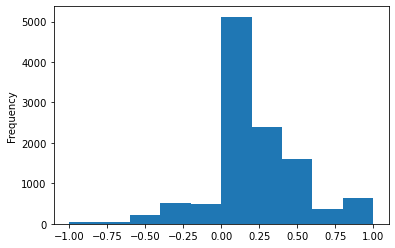

In [16]:
lemon_balm['Polarity'].plot(kind='hist');

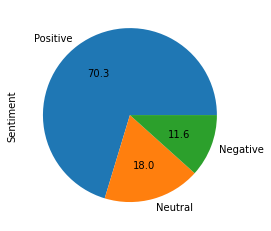

In [17]:
lemon_balm['Sentiment'].value_counts().plot(kind='pie', autopct='%.1f');

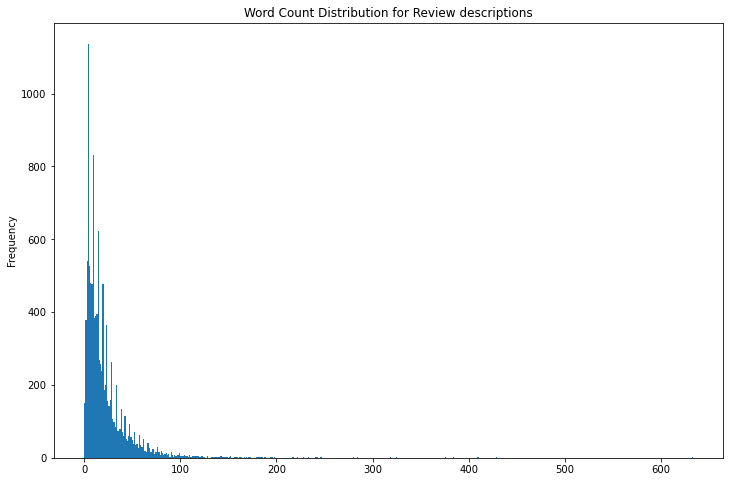

In [18]:
# Calculating the word count for Review description
lemon_balm['word_count'] = lemon_balm['ReviewContent_Clean'].apply(lambda x: len(str(x).split()))# Plotting the word count
lemon_balm['word_count'].plot(
    kind='hist',
    bins = 500,
    figsize = (12,8),title='Word Count Distribution for Review descriptions');

In [19]:
neg_df=lemon_balm[lemon_balm['Polarity']<0]
neg_df[['ReviewContent_Clean','Polarity']].sort_values('Polarity')

ReviewContent_Clean  Polarity
615121            lemon balm smell horrible like supposed      -1.0
614533                                   smell awful work      -1.0
609792        told get sleep tried taste awful cannot use      -1.0
626274  might work others work mom unfortunately terri...      -1.0
610011  bought balm daughter use hand horrible eczema ...      -1.0
...                                                   ...       ...
195925  terrible taste son refuse take hide food.the g...      -0.1
615260  almost afraid write review fear may jinx resul...      -0.1
615266  course hoping shorten healing time cold sore i...      -0.1
615076  adhd year old restless taking hour fall asleep...      -0.1
612663                            like smell keep lip dry      -0.1

[1335 rows x 2 columns]

In [20]:
pos_df=lemon_balm[lemon_balm['Polarity']>0]
pos_df[['ReviewContent_Clean','Polarity']].sort_values('Polarity', ascending=False)

ReviewContent_Clean  Polarity
57101                             wonderful product,thank       1.0
625535                          delicious excellent sleep       1.0
57084   absolutely perfect anyone like making tea flav...       1.0
626663                   best vegan melatonin replacement       1.0
610568                 kneipp mineral bath salt wonderful       1.0
...                                                   ...       ...
144025  let first give caveat entirely possible experi...       0.1
144030  flavor yeah get used going take guess make ber...       0.1
144066  taken different kind olly vitamin year never i...       0.1
613134  product work yr old molescum month product fix...       0.1
609417                                 make relax natural       0.1

[8062 rows x 2 columns]

In [21]:
mid_pos_df=lemon_balm[lemon_balm['Polarity']>=0.5]
high_pos_df=lemon_balm[lemon_balm['Polarity']>=0.8]
mid_neg_df=lemon_balm[lemon_balm['Polarity']<=-0.5]
high_neg_df=lemon_balm[lemon_balm['Polarity']<=-0.8]

In [22]:
mid_pos_df[['ReviewContent_Clean','Polarity']].sort_values('Polarity', ascending=True)

ReviewContent_Clean  Polarity
4496    tea amazing tried many stress sleepy time tea ...       0.5
609927                                smell amazing worth       0.5
609925  wonderful essential oil melissa aka lemon balm...       0.5
609924  lemon balm leaf best love hot tea good ice tea...       0.5
609921                          nic lemon balm sure order       0.5
...                                                   ...       ...
57717                 delicious tea however taste lemon-y       1.0
141226  road truck driver goodbye stress gummies work ...       1.0
613027                                     wonderful work       1.0
57510                                           delicious       1.0
56476   buddha tea always excellent quality support pr...       1.0

[2613 rows x 2 columns]

In [23]:
high_pos_df[['ReviewContent_Clean','Polarity']].sort_values('Polarity', ascending=False)

ReviewContent_Clean  Polarity
5585       received order timely manner product wonderful       1.0
143383                                          delicious       1.0
134760  item perfect condition worked promised arrived...       1.0
137913                                            awesome       1.0
138420                                 taste texture best       1.0
...                                                   ...       ...
143819                                        taste great       0.8
143764                      taste great notice difference       0.8
56973                                       great product       0.8
143467                               great source vitamin       0.8
192737  problem order product description said pack re...       0.8

[645 rows x 2 columns]

In [24]:
mid_neg_df[['ReviewContent_Clean','Polarity']].sort_values('Polarity', ascending=False)

ReviewContent_Clean  Polarity
4634    tried expensive sleep time tea helped sleep gr...      -0.5
612873   lip terrible shape disappointed really seem help      -0.5
612770  yuck bought product perceived medicinal value ...      -0.5
611890  say disappointed cover depth feeling product f...      -0.5
611836  used take another product sleep got expensive ...      -0.5
...                                                   ...       ...
619097  taste horrible work kid gagged eating upon tas...      -1.0
59397                      thought taste terrible hopeful      -1.0
136746   tried day difference energy level taste terrible      -1.0
619619                          tasted terrible would eat      -1.0
140182  taste really terrible yuck bought child neithe...      -1.0

[232 rows x 2 columns]

In [25]:
high_neg_df[['ReviewContent_Clean','Polarity']].sort_values('Polarity', ascending=False)

ReviewContent_Clean  Polarity
56441   susposed get pack got would ordered price make...      -0.8
612881  use lip balm per dr oz preventative cold sore ...      -0.8
196332  done nothing child hoping would sadly disappoi...      -0.8
609576             product give son diarrhea disappointed      -0.8
56810                                 flavor disappointed      -0.8
...                                                   ...       ...
135526                         horrible taste threw trash      -1.0
612806                                  horrible burn lip      -1.0
133732                     changed product taste terrible      -1.0
125269                  kept wired night horrible product      -1.0
610258                taste like soap cannot use horrible      -1.0

[71 rows x 2 columns]

In [26]:
all_words= []

for review in lemon_balm.ReviewContent_Clean:
    all_words.append(review)
all_words=' '.join(all_words)

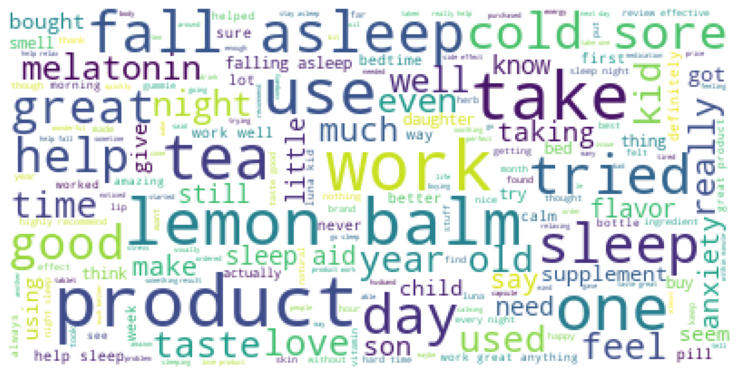

In [27]:
wordcloud= WordCloud().generate(all_words)
wordcloud = WordCloud(background_color="white", max_words=len(all_words),
                      max_font_size=40, relative_scaling=.5).generate(all_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [28]:
pos_words=[]

for review in pos_df.ReviewContent_Clean:
    pos_words.append(review)
pos_words=' '.join(pos_words)

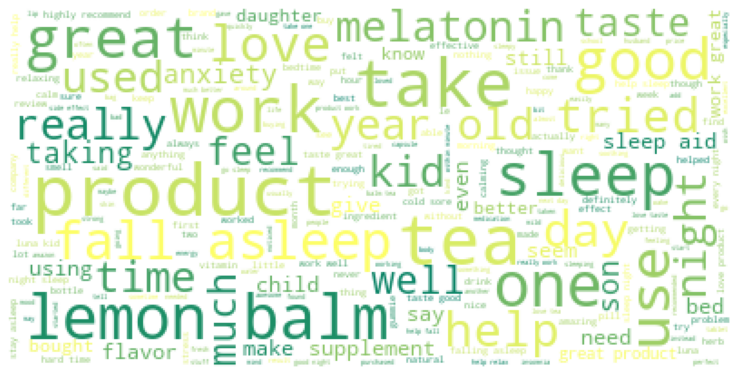

In [29]:
wordcloud= WordCloud().generate(pos_words)
wordcloud = WordCloud(background_color="white", max_words=len(pos_words),
                      max_font_size=40, relative_scaling=.5, colormap='summer').generate(pos_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [30]:
neg_words=[]

for review in neg_df.ReviewContent_Clean:
    neg_words.append(review)
neg_words=' '.join(neg_words)

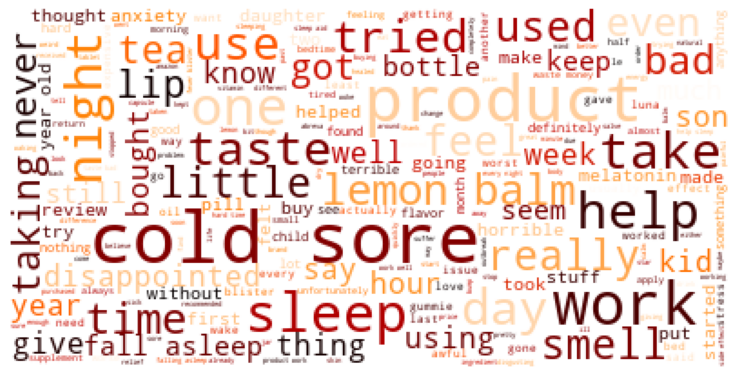

In [31]:
wordcloud= WordCloud().generate(neg_words)
wordcloud = WordCloud(background_color="white", max_words=len(neg_words),
                      max_font_size=40, relative_scaling=.5, colormap='gist_heat').generate(neg_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [32]:
mid_pos_words= []

for review in mid_pos_df.ReviewContent_Clean:
    mid_pos_words.append(review)
mid_pos_words=' '.join(mid_pos_words)

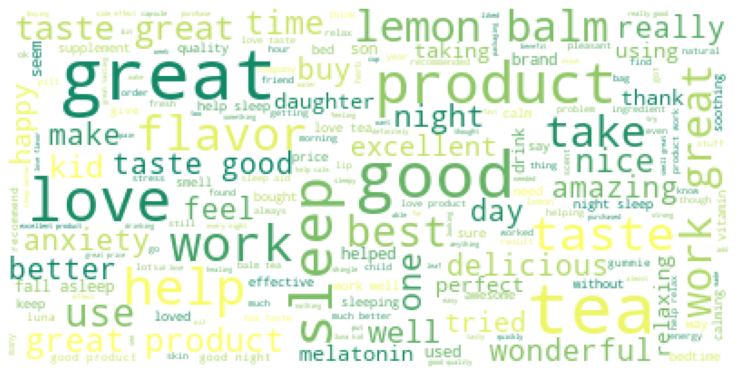

In [33]:
wordcloud= WordCloud().generate(mid_pos_words)
wordcloud = WordCloud(background_color="white", max_words=len(mid_pos_words),
                      max_font_size=40, relative_scaling=.5, colormap='summer').generate(mid_pos_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

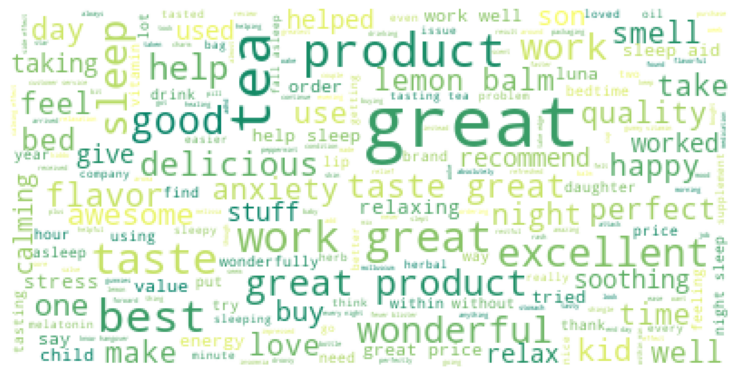

In [34]:
high_pos_words= []

for review in high_pos_df.ReviewContent_Clean:
    high_pos_words.append(review)
high_pos_words=' '.join(high_pos_words)
wordcloud= WordCloud().generate(high_pos_words)
wordcloud = WordCloud(background_color="white", max_words=len(high_pos_words),
                      max_font_size=40, relative_scaling=.5, colormap='summer').generate(high_pos_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

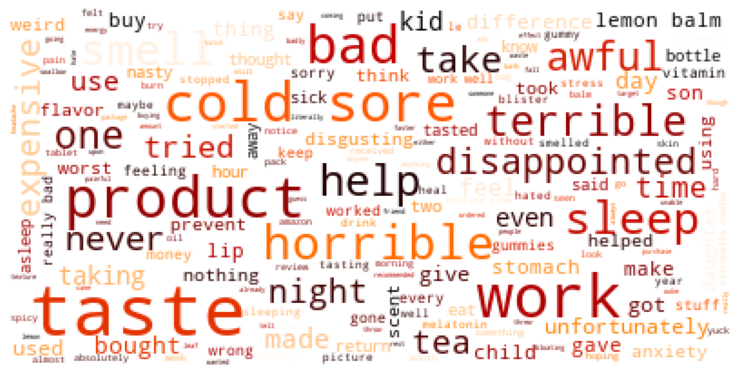

In [35]:
mid_neg_words= []

for review in mid_neg_df.ReviewContent_Clean:
    mid_neg_words.append(review)
mid_neg_words=' '.join(mid_neg_words)
wordcloud= WordCloud().generate(mid_neg_words)
wordcloud = WordCloud(background_color="white", max_words=len(mid_neg_words),
                      max_font_size=40, relative_scaling=.5, colormap='gist_heat').generate(mid_neg_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

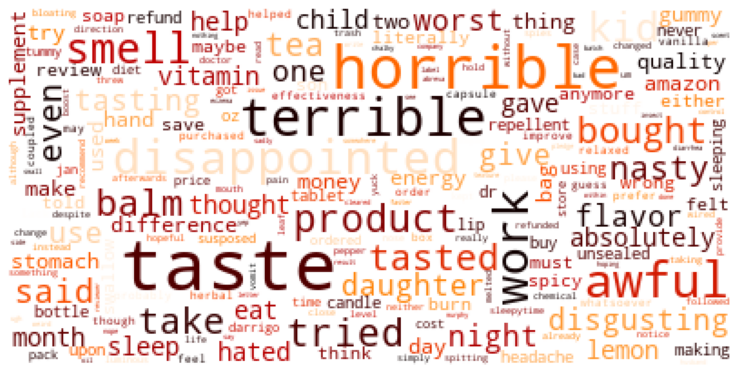

In [36]:
high_neg_words= []

for review in high_neg_df.ReviewContent_Clean:
    high_neg_words.append(review)
high_neg_words=' '.join(high_neg_words)
wordcloud= WordCloud().generate(high_neg_words)
wordcloud = WordCloud(background_color="white", max_words=len(high_neg_words),
                      max_font_size=40, relative_scaling=.5, colormap='gist_heat').generate(high_neg_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [37]:
# allreview_df1.to_csv("allreview-preprocessed.csv",index=True)

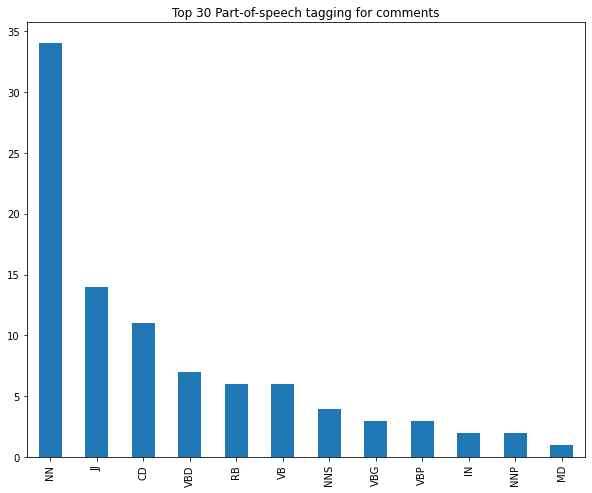

In [38]:
blob = TextBlob(str(lemon_balm['ReviewContent_Clean']))
pos_tag_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_tag_df = pos_tag_df.pos.value_counts()[:30]
pos_tag_df.plot(kind = 'bar', figsize=(10, 8), title = "Top 30 Part-of-speech tagging for comments");

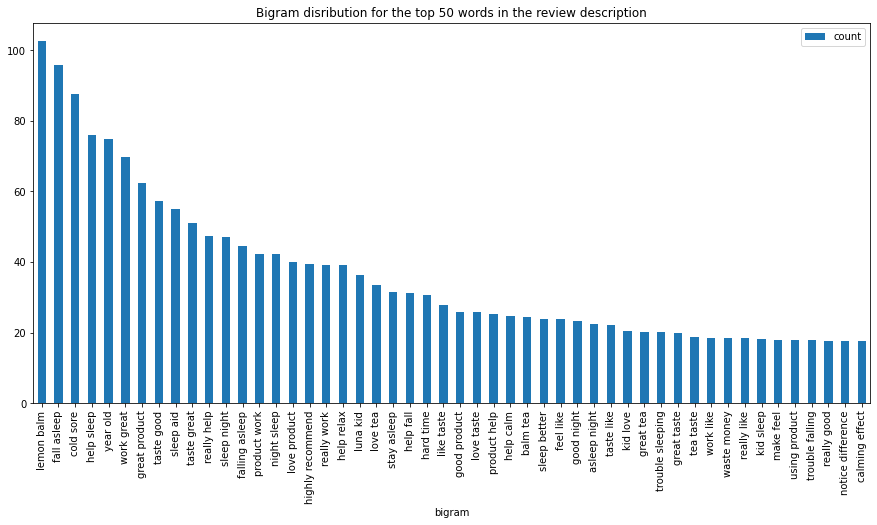

In [39]:
#Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(lemon_balm['ReviewContent_Clean'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(50)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 50 words in the review description", figsize = (15,7), );


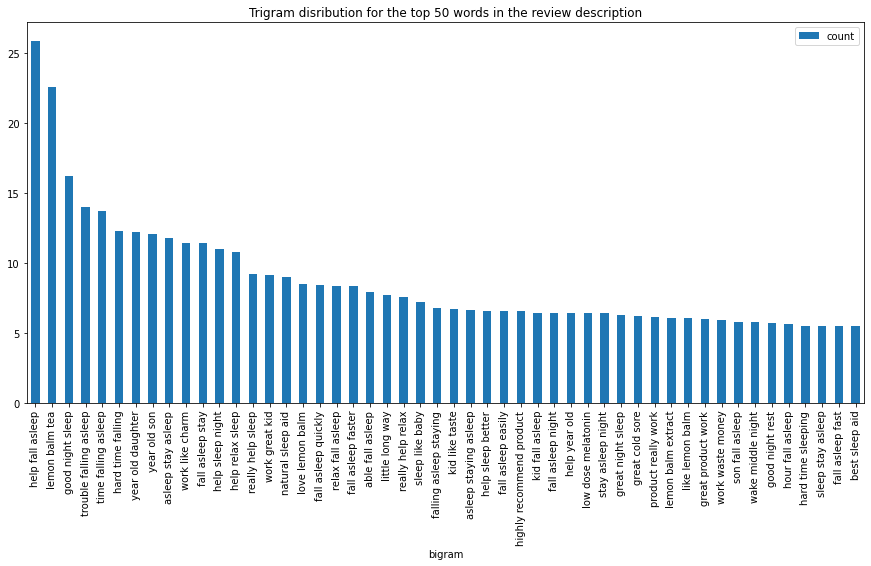

In [40]:
#Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(3, 3), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(lemon_balm['ReviewContent_Clean'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(50)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Trigram disribution for the top 50 words in the review description", figsize = (15,7), );


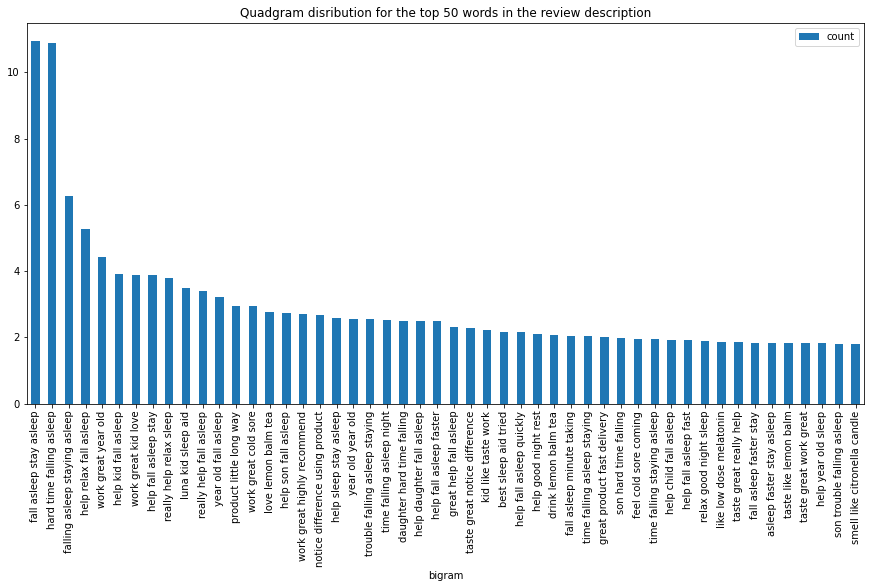

In [41]:
#Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(4, 4), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(lemon_balm['ReviewContent_Clean'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(50)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Quadgram disribution for the top 50 words in the review description", figsize = (15,7), );


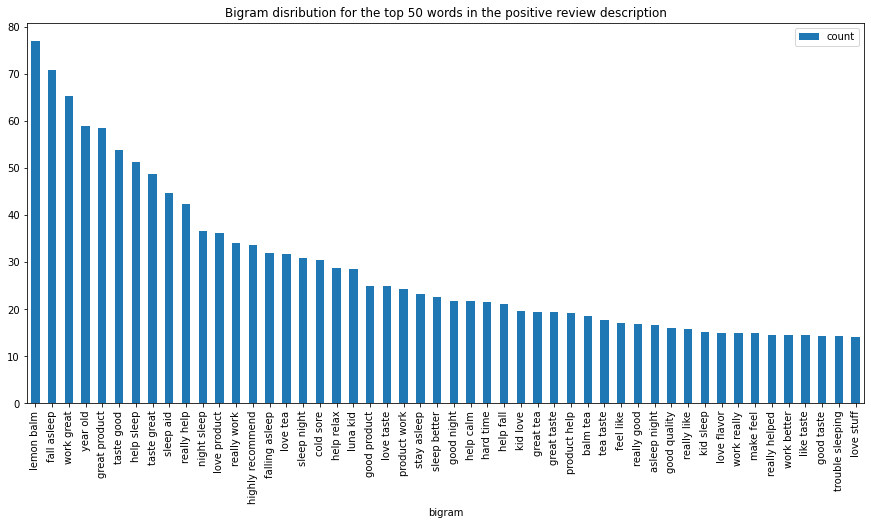

In [42]:
#Converting text descriptions into vectors using TF-IDF using Bigram
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(pos_df['ReviewContent_Clean'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(50)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 50 words in the positive review description", figsize = (15,7), );

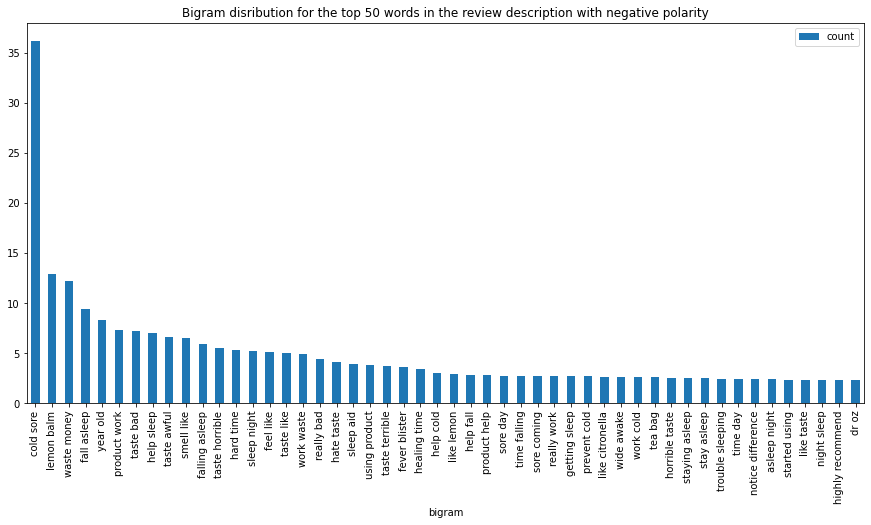

In [43]:
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(neg_df['ReviewContent_Clean'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(50)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 50 words in the review description with negative polarity", figsize = (15,7), );

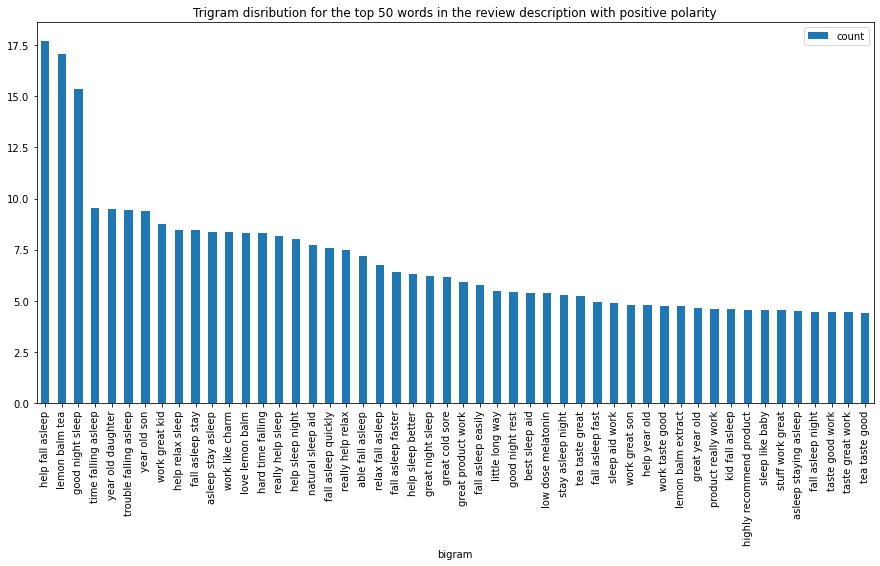

In [44]:
tf = TfidfVectorizer(ngram_range=(3, 3), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(pos_df['ReviewContent_Clean'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(50)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Trigram disribution for the top 50 words in the review description with positive polarity", figsize = (15,7), );

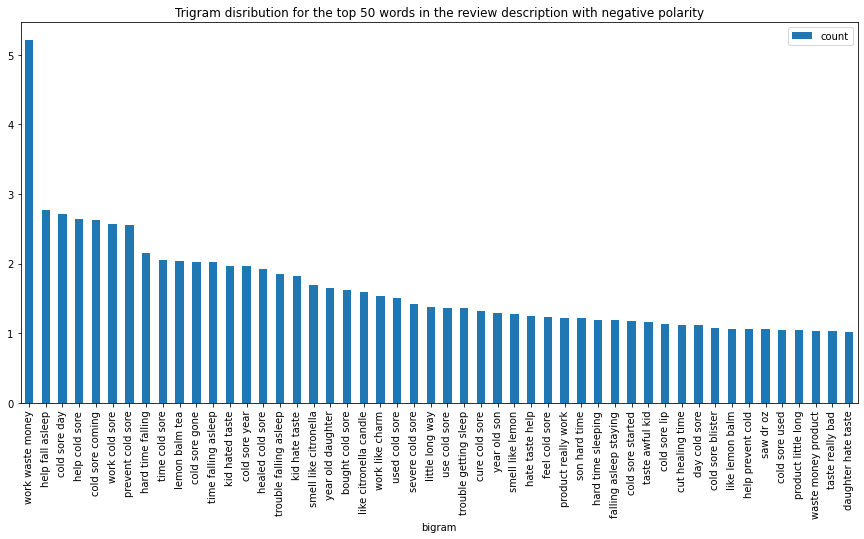

In [45]:
tf = TfidfVectorizer(ngram_range=(3, 3), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(neg_df['ReviewContent_Clean'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(50)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Trigram disribution for the top 50 words in the review description with negative polarity", figsize = (15,7), );

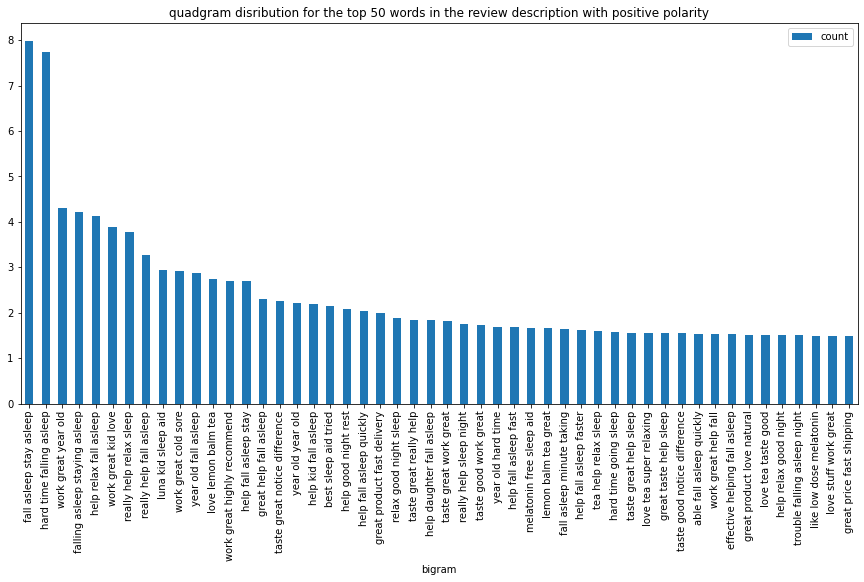

In [46]:
tf = TfidfVectorizer(ngram_range=(4, 4), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(pos_df['ReviewContent_Clean'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(50)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "quadgram disribution for the top 50 words in the review description with positive polarity", figsize = (15,7), );

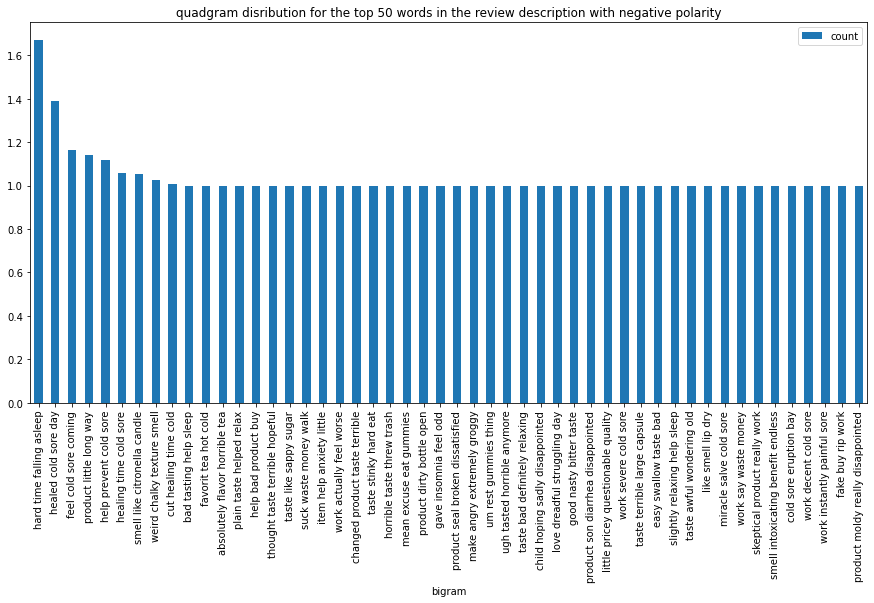

In [47]:
tf = TfidfVectorizer(ngram_range=(4, 4), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(neg_df['ReviewContent_Clean'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(50)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "quadgram disribution for the top 50 words in the review description with negative polarity", figsize = (15,7), );

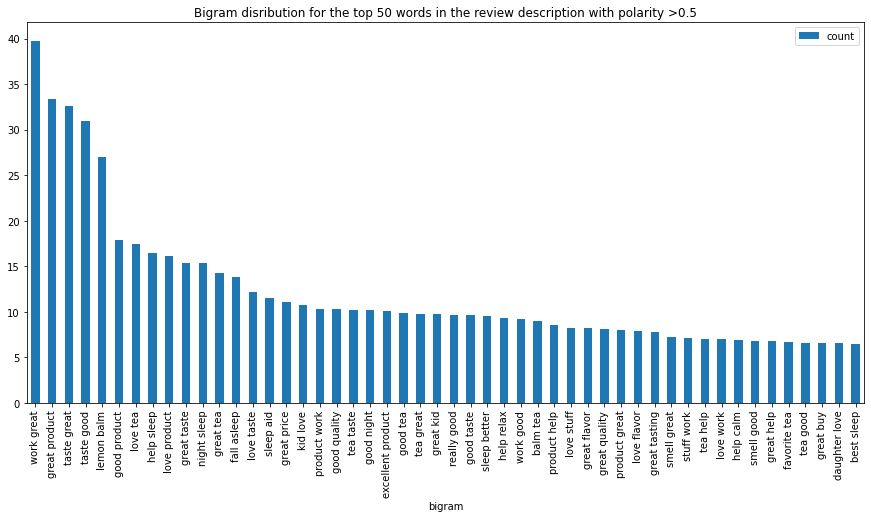

In [48]:
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(mid_pos_df['ReviewContent_Clean'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(50)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 50 words in the review description with polarity >0.5", figsize = (15,7), );

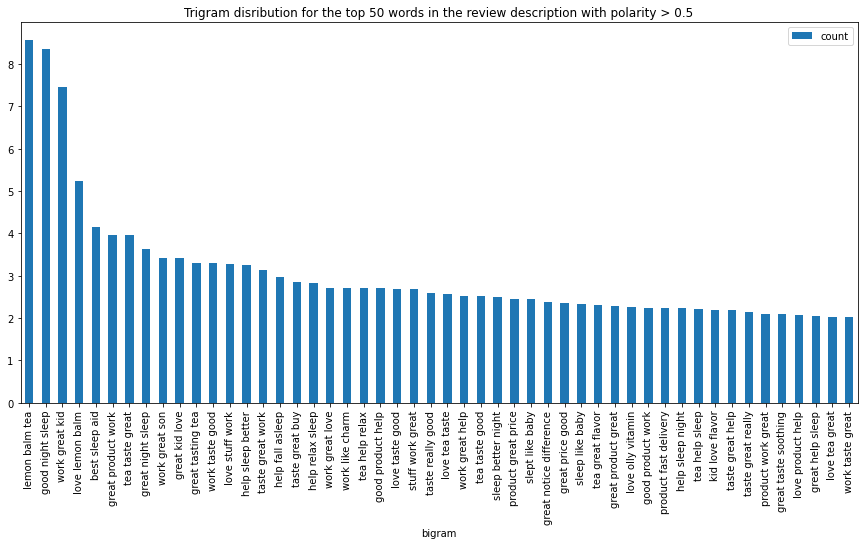

In [49]:
tf = TfidfVectorizer(ngram_range=(3, 3), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(mid_pos_df['ReviewContent_Clean'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(50)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Trigram disribution for the top 50 words in the review description with polarity > 0.5", figsize = (15,7), );

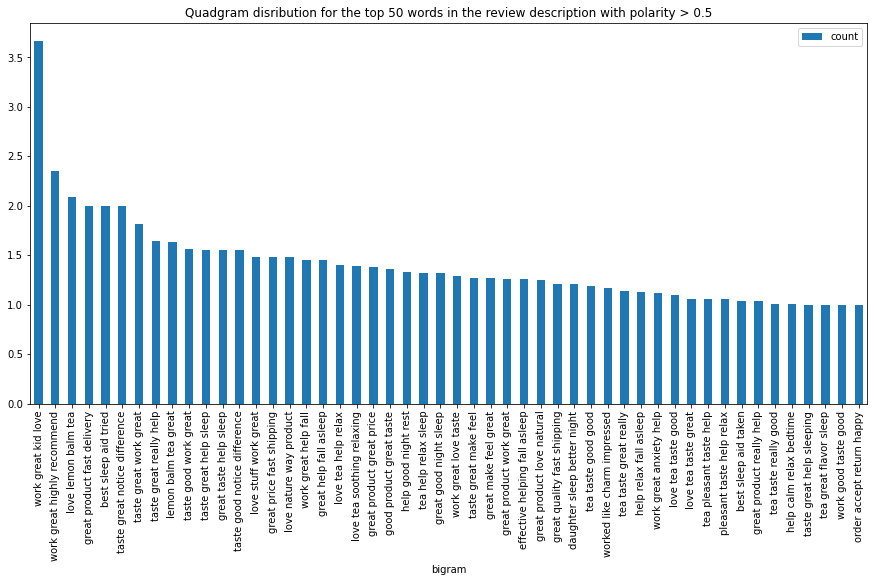

In [50]:
tf = TfidfVectorizer(ngram_range=(4, 4), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(mid_pos_df['ReviewContent_Clean'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(50)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Quadgram disribution for the top 50 words in the review description with polarity > 0.5", figsize = (15,7), );

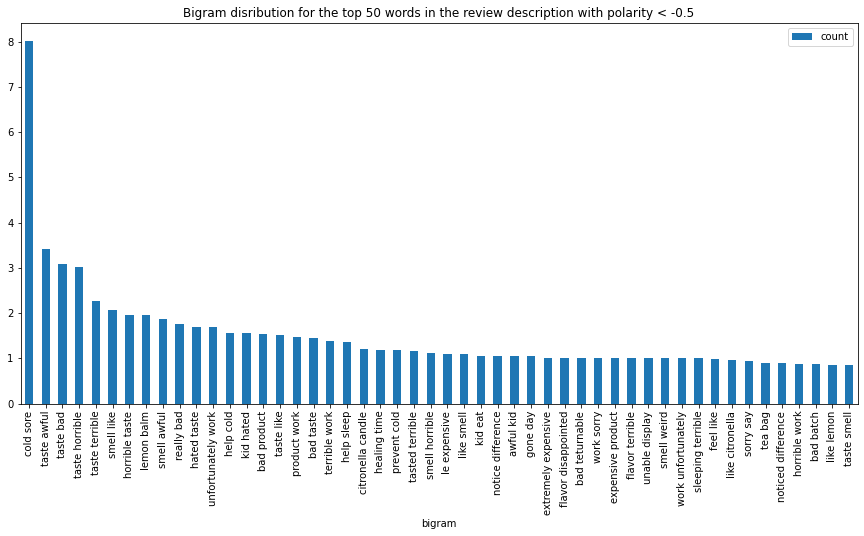

In [51]:
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(mid_neg_df['ReviewContent_Clean'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(50)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 50 words in the review description with polarity < -0.5", figsize = (15,7), );

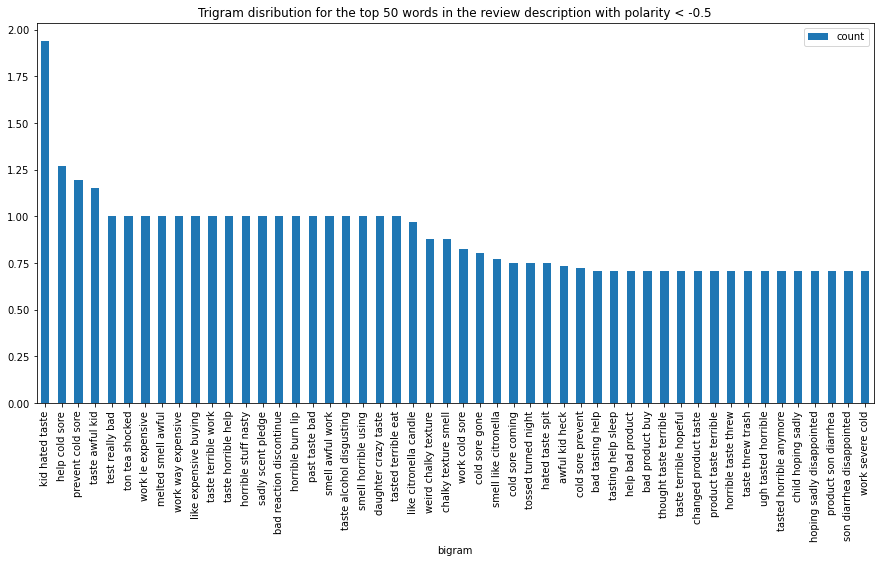

In [52]:
tf = TfidfVectorizer(ngram_range=(3, 3), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(mid_neg_df['ReviewContent_Clean'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(50)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Trigram disribution for the top 50 words in the review description with polarity < -0.5", figsize = (15,7), );

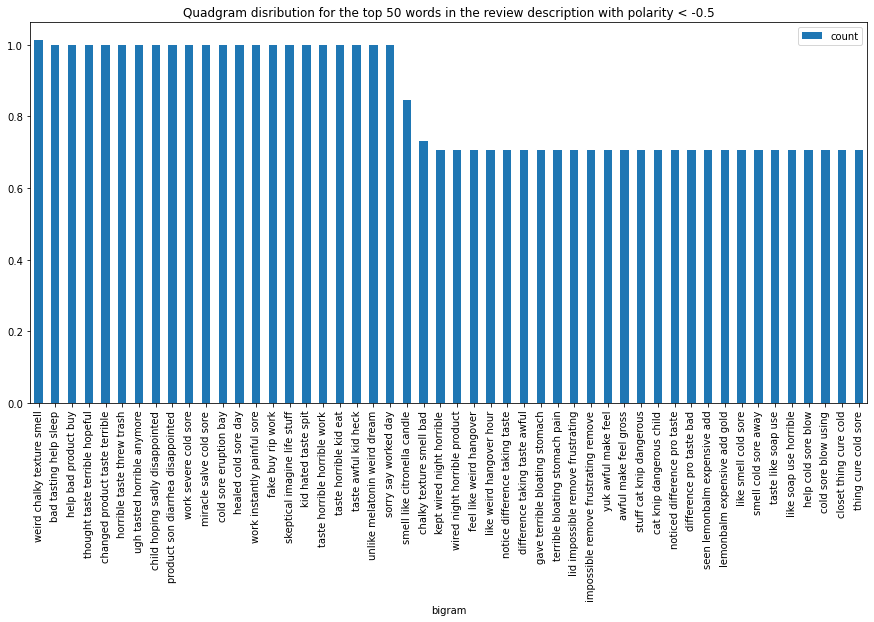

In [53]:
tf = TfidfVectorizer(ngram_range=(4, 4), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(mid_neg_df['ReviewContent_Clean'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(50)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Quadgram disribution for the top 50 words in the review description with polarity < -0.5", figsize = (15,7), );

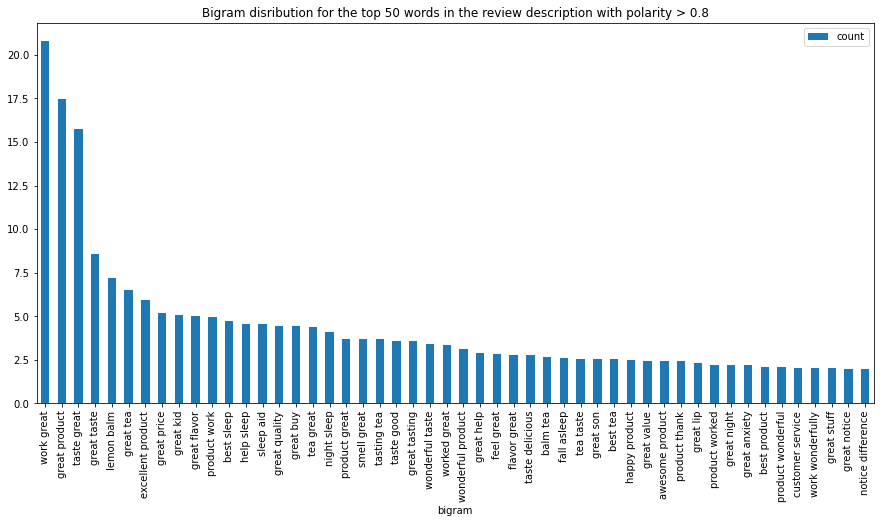

In [54]:
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(high_pos_df['ReviewContent_Clean'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(50)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 50 words in the review description with polarity > 0.8", figsize = (15,7), );

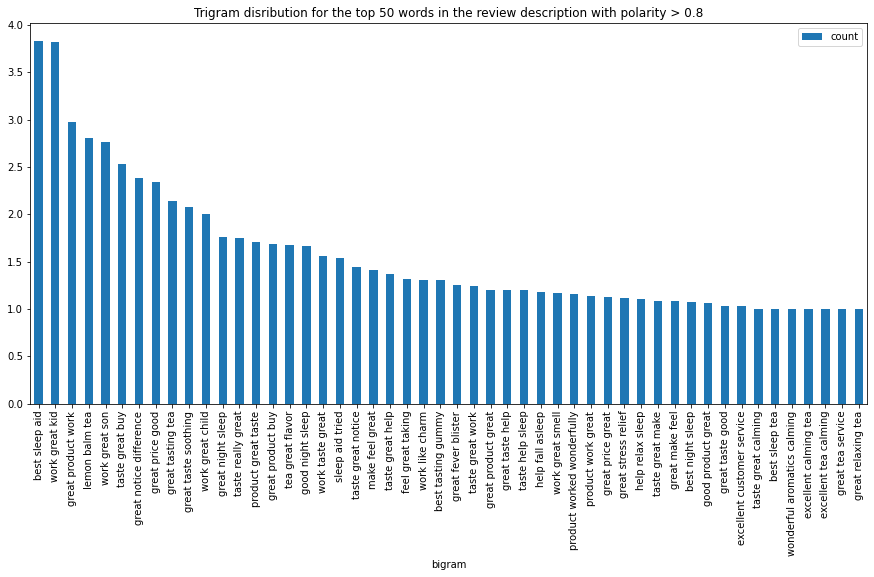

In [55]:
tf = TfidfVectorizer(ngram_range=(3, 3), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(high_pos_df['ReviewContent_Clean'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(50)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Trigram disribution for the top 50 words in the review description with polarity > 0.8", figsize = (15,7), );

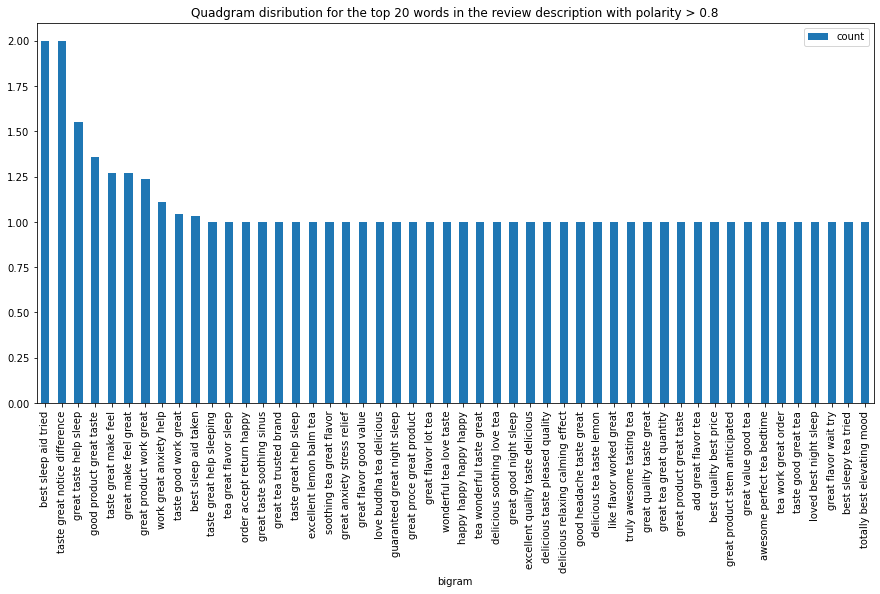

In [56]:
tf = TfidfVectorizer(ngram_range=(4, 4), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(high_pos_df['ReviewContent_Clean'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(50)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Quadgram disribution for the top 20 words in the review description with polarity > 0.8", figsize = (15,7), );

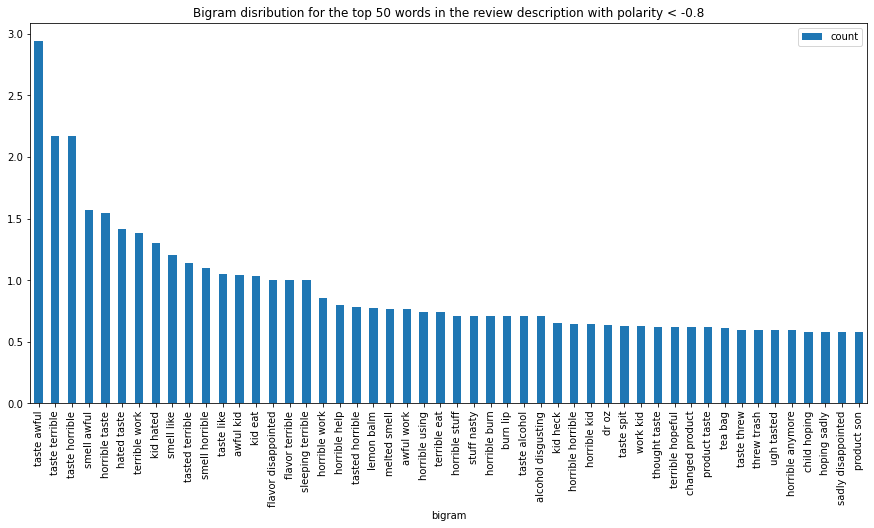

In [57]:
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(high_neg_df['ReviewContent_Clean'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(50)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Bigram disribution for the top 50 words in the review description with polarity < -0.8", figsize = (15,7), );

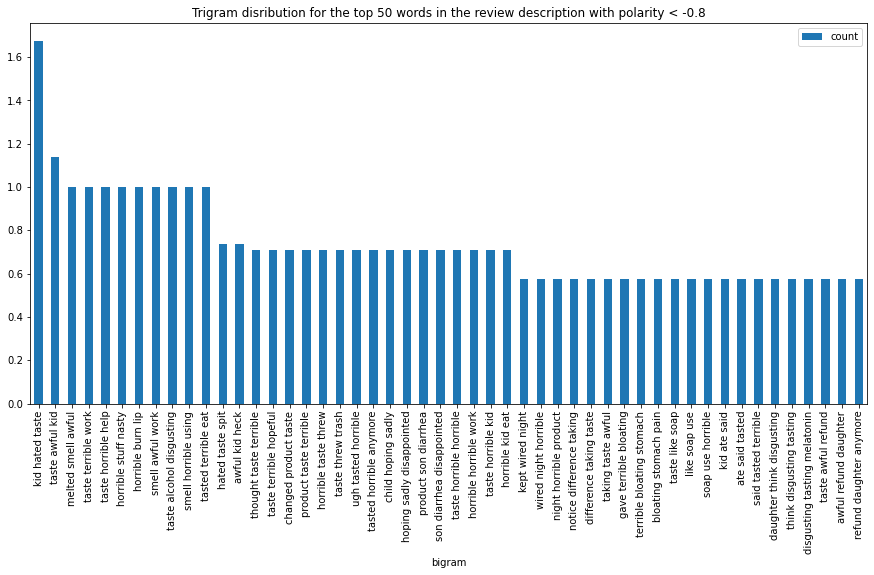

In [58]:
tf = TfidfVectorizer(ngram_range=(3, 3), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(high_neg_df['ReviewContent_Clean'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(50)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Trigram disribution for the top 50 words in the review description with polarity < -0.8", figsize = (15,7), );

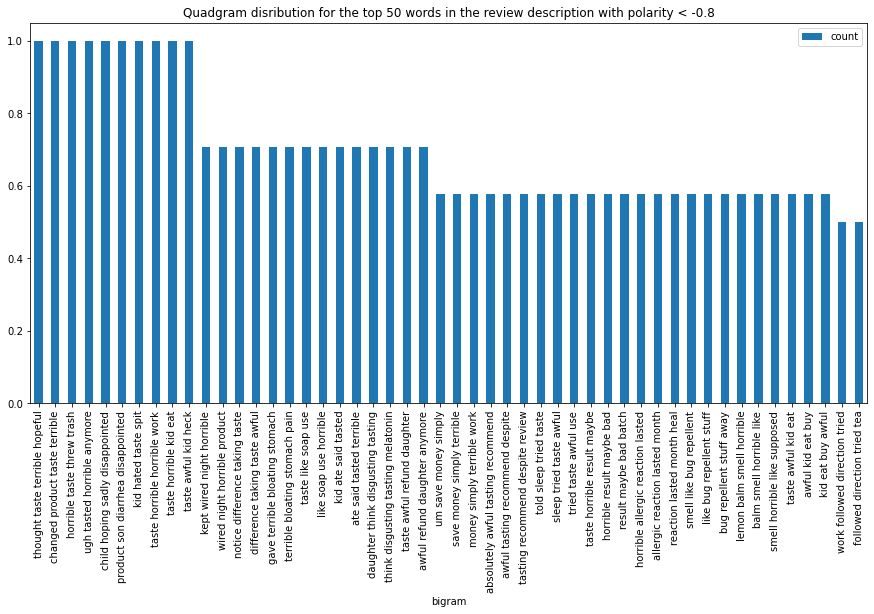

In [59]:
tf = TfidfVectorizer(ngram_range=(4, 4), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(high_neg_df['ReviewContent_Clean'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(50)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Quadgram disribution for the top 50 words in the review description with polarity < -0.8", figsize = (15,7), );

In [60]:
import re

def match(input_string, string_list):
    words = re.findall(r'\w+', input_string)
    list=[word for word in words if word in string_list]
    return ' '.join(list)

In [61]:
#Define keywords list for anxiety, stress and sleep
anxiety_list = ['anxiety','anxious','anxieti','angst','apprehension','concern','disquiet','doubt','dread','jitters','misery','misgiving','mistrust','nervousness','panic',
'restlessness','suffering','suspense','trouble','uncertainty','unease','uneasiness','soothe','invigorated']

stress_list = ['stress','relax','calm','calm down','cool off','soothe','lie down','recline','rest','stressful','relief','ease', 'heart burn', 'inflammation']

sleep_list = ['sleep','dream','hibernation','slumber','bed','bedtime','nap','rest','snooze','sleepy','asleep','slept',
  'drowsi', 'drowsy', 'hot flash', 'insomnia', 'insomniac', 'rested', 'sleepiness', 'sweet dreams', 'wake up', 'wind down']
side_effect_effect_list= ["chronic", 'acute', 'pain', 'ache','fever','agony','cramp','discomfort', 'irritate','sore','strain','burn','ill',
                         'irritation','backlash','inflammation','puke','pukey','gag','gagged','psoriasis','hyperthyroidism','restless','allergy','allergic','attack',
                         'groggy','sick','headache','bloating','diarrhea','pain','itch','itchy','itching','fever','blister','insomnia','painful','cold' 
                         ]

#Call match function to get anxiety_key in each review using anxiety_list 
lemon_balm["anxiety_key"] = lemon_balm["ReviewContent_Clean"].apply(lambda x: match(input_string=x, string_list=anxiety_list))

# Call match function to get stress_key in each review using stress_list 
lemon_balm["stress_key"] = lemon_balm["ReviewContent_Clean"].apply(lambda x: match(input_string=x, string_list=stress_list))

#Call match function to get sleep_key in each review using sleep_list 
lemon_balm["sleep_key"] = lemon_balm["ReviewContent_Clean"].apply(lambda x: match(input_string=x, string_list=sleep_list))
lemon_balm["side_effect_key"]= lemon_balm["ReviewContent_Clean"].apply(lambda x: match(input_string=x,string_list=side_effect_effect_list))

In [62]:
pd.set_option('display.max_row',20)
pd.set_option('display.max_colwidth',100)
lemon_balm

ASIN        ReviewId            Keyword  KeywordDept  \
4471    B0171QF5R8  R35C19QBMHJS9W      chamomile+tea          0.0   
4483    B0171QF5R8  R1IOQ5LK6LLQ0F      chamomile+tea          0.0   
4496    B0171QF5R8  R1TCAX3FYG7LWS      chamomile+tea          0.0   
4513    B0171QF5R8   RWVVC4AGCBGAU      chamomile+tea          0.0   
4529    B0171QF5R8  R26NV30TBF4C77      chamomile+tea          0.0   
...            ...             ...                ...          ...   
788698  B07XC8YVSF  R3PUBD6BG9PKBW  valerian+root+tea          1.0   
788699  B07XC8YVSF  R2ZOHRKLXQILK1  valerian+root+tea          1.0   
788700  B07XC8YVSF  R1SUMIKJMCOD7I  valerian+root+tea          1.0   
788701  B07XC8YVSF   R1HUVZC8J0CRU  valerian+root+tea          1.0   
788712  B07XC8YVSF  R34E28OW7CB0H7  valerian+root+tea          1.0   

       ProductFlavor_reviews  \
4471           Flavor_absent   
4483           Flavor_absent   
4496           Flavor_absent   
4513           Flavor_absent   
4529           Flavor_absent   
...                      ...   
788698         Flavor_absent   
788699         Flavor_absent   
788700         Flavor_absent   
788701         Flavor_absent   
788712         Flavor_absent   

                                                                                        ProductName_reviews  \
4471    herbal tea sleep aid w chamomile valerian root lemon balm tea bags aids anxiety stress relief th...   
4483    herbal tea sleep aid w chamomile valerian root lemon balm tea bags aids anxiety stress relief th...   
4496    herbal tea sleep aid w chamomile valerian root lemon balm tea bags aids anxiety stress relief th...   
4513    herbal tea sleep aid w chamomile valerian root lemon balm tea bags aids anxiety stress relief th...   
4529    herbal tea sleep aid w chamomile valerian root lemon balm tea bags aids anxiety stress relief th...   
...                                                                                                     ...   
788698  vitamin friends kids sleep gummy melatonin free chamomile lemon balm valerian root vitamin natur...   
788699  vitamin friends kids sleep gummy melatonin free chamomile lemon balm valerian root vitamin natur...   
788700  vitamin friends kids sleep gummy melatonin free chamomile lemon balm valerian root vitamin natur...   
788701  vitamin friends kids sleep gummy melatonin free chamomile lemon balm valerian root vitamin natur...   
788712  vitamin friends kids sleep gummy melatonin free chamomile lemon balm valerian root vitamin natur...   

        ProductNumReviews  \
4471                  689   
4483                  689   
4496                  689   
4513                  689   
4529                  689   
...                   ...   
788698                 21   
788699                 21   
788700                 21   
788701                 21   
788712                 21   

                                                                                              ReviewContent  \
4471                       Definitely my new fav tea! Not only does it taste amazing but it actually works!   
4483    Hey Girl proved to do all it says it does !  I bought it for my niece who was having stress indu...   
4496    This tea is amazing! I’ve tried so many stress and sleepy time teas that didn’t seem to do anyth...   
4513    Bought as a gift for my good friend, and she tried the tea, and fell asleep 15 minutes later! Co...   
4529    I love this tea! It tastes great, and it really does help relax me for bed. I have a hard time s...   
...                                                                                                     ...   
788698  This product has excellent ingredients that help me drift off to sleep. That's saying something ...   
788699  I gave these to my daughter with very high hopes. I was hoping that they would work. Lord did th...   
788700  This works very well on the kid who doesn't like to go to bed at nigut. It doesn't knock them ou...

In [63]:
side_effect=lemon_balm["side_effect_key"].replace('',np.nan)

In [64]:
print('The percentage of reviews that reported side effect is: ', np.round(100 - (side_effect.isna().sum()/side_effect.shape[0] * 100), 2),'%')

The percentage of reviews that reported side effect is:  16.28 %


In [65]:
side_effect=side_effect[side_effect.isna()==False]

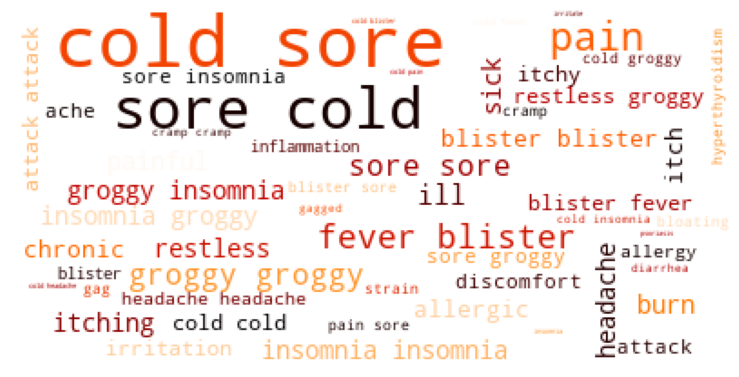

In [66]:
side_effects= []

for word in side_effect:
    side_effects.append(word)
side_effects=' '.join(side_effects)
wordcloud= WordCloud().generate(side_effects)
wordcloud = WordCloud(background_color="white", max_words=len(side_effects),
                      max_font_size=40, relative_scaling=.5, colormap='gist_heat').generate(side_effects)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

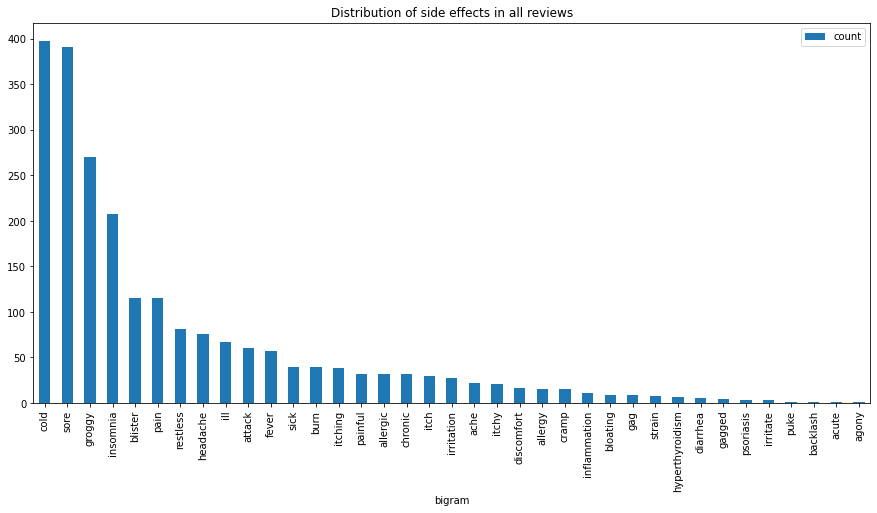

In [67]:
tf = TfidfVectorizer(ngram_range=(1, 1), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(side_effect)
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(50)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Distribution of side effects in all reviews", figsize = (15,7), );

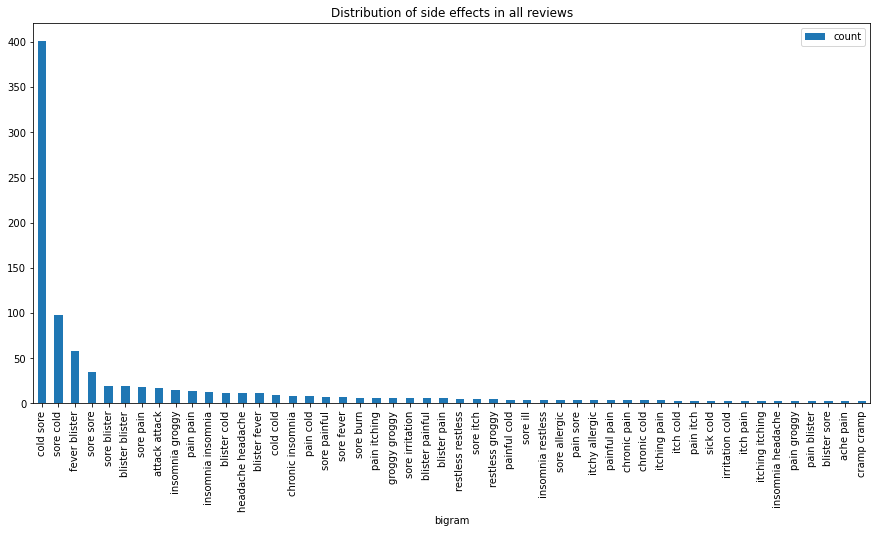

In [68]:
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(side_effect)
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
bigram = pd.DataFrame(freq)
bigram.rename(columns = {0:'bigram', 1: 'count'}, inplace = True) 
#Taking first 20 records
bigram = bigram.head(50)

#Plotting the bigram distribution
bigram.plot(x ='bigram', y='count', kind = 'bar', title = "Distribution of side effects in all reviews", figsize = (15,7), );

In [69]:
from nltk.corpus import stopwords

In [70]:
# from textblob import TextBlob
 
# def pos_tagger(sentence):
#     sent = TextBlob(sentence)
#     tag_dict = {"J": 'a', "N": 'n', "V": 'v', "R": 'r'}
#     words_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]   
#     lemma_list = [wd.lemmatize(tag) for wd, tag in words_tags]
#     return lemma_list
# def lemmatization(sentence):
#     lemma_list = pos_tagger(sentence)
#     lemmatized_sentence = " ".join(lemma_list)
#     return lemmatized_sentence
# x['Better_experience']=x['Better_experience'].apply(lemmatization)


In [71]:
# Do side effect, products with more bad reviews, ingredient analysis

In [72]:
pd.set_option('display.max_row',20)
pd.set_option('display.max_colwidth',100)
ingredient_df=lemon_balm[['ASIN','ProductFlavor_reviews','ReviewContent_Clean', 'ProductIngredientList', 'Polarity', 'Sentiment',]]
ingredient_df

ASIN ProductFlavor_reviews  \
4471    B0171QF5R8         Flavor_absent   
4483    B0171QF5R8         Flavor_absent   
4496    B0171QF5R8         Flavor_absent   
4513    B0171QF5R8         Flavor_absent   
4529    B0171QF5R8         Flavor_absent   
...            ...                   ...   
788698  B07XC8YVSF         Flavor_absent   
788699  B07XC8YVSF         Flavor_absent   
788700  B07XC8YVSF         Flavor_absent   
788701  B07XC8YVSF         Flavor_absent   
788712  B07XC8YVSF         Flavor_absent   

                                                                                        ReviewContent_Clean  \
4471                                                     definitely new fav tea taste amazing actually work   
4483    hey girl proved say bought niece stress induced anxiety difficulty sleeping heard back sleeping ...   
4496    tea amazing tried many stress sleepy time tea seem anything mixture herb really work feel relaxe...   
4513    bought gift good friend tried tea fell asleep minute later completely conked woman never sleep p...   
4529    love tea taste great really help relax bed hard time sleeping tea definitely trick top amazing c...   
...                                                                                                     ...   
788698  product excellent ingredient help drift sleep saying something insomnia know kid product unfortu...   
788699  gave daughter high hope hoping would work lord swear wired normally fall asleep easily today gav...   
788700           work well kid like go bed nigut knock relaxes enough fall asleep quickly stay asleep night   
788701  vitamin friend sleep gummies good arrived quickly well packaged taste amazing packed nutritional...   
788712                                     find effective melatonin gummies kid fond taste smell said weird   

                                                                                      ProductIngredientList  \
4471    Passion Flower, Chamomile Flower, Lemon Balm, Orange Peel, Catnip Herb, Stevia Leaf ,Valerian Ro...   
4483    Passion Flower, Chamomile Flower, Lemon Balm, Orange Peel, Catnip Herb, Stevia Leaf ,Valerian Ro...   
4496    Passion Flower, Chamomile Flower, Lemon Balm, Orange Peel, Catnip Herb, Stevia Leaf ,Valerian Ro...   
4513    Passion Flower, Chamomile Flower, Lemon Balm, Orange Peel, Catnip Herb, Stevia Leaf ,Valerian Ro...   
4529    Passion Flower, Chamomile Flower, Lemon Balm, Orange Peel, Catnip Herb, Stevia Leaf ,Valerian Ro...   
...                                                                                                     ...   
788698  Organic Cane Sugar, Organic Tapioca Syrup, Water, Pectin, Natural Flavors, Citric Acid, Sodium C...   
788699  Organic Cane Sugar, Organic Tapioca Syrup, Water, Pectin, Natural Flavors, Citric Acid, Sodium C...   
788700  Organic Cane Sugar, Organic Tapioca Syrup, Water, Pectin, Natural Flavors, Citric Acid, Sodium C...   
788701  Organic Cane Sugar, Organic Tapioca Syrup, Water, Pectin, Natural Flavors, Citric Acid, Sodium C...   
788712  Organic Cane Sugar, Organic Tapioca Syrup, Water, Pectin, Natural Flavors, Citric Acid, Sodium C...   

        Polarity Sentiment  
4471         0.2  Positive  
4483         0.0   Neutral  
4496         0.5  Positive  
4513         0.2  Positive  
4529         0.3  Positive  
...          ...       ...  
788698       0.3  Positive  
788699       0.2  Positive  
788700       0.2  Positive  
788701       0.4  Positive  
788712       0.0   Neutral  

[11465 rows x 6 columns]

In [73]:
pd.set_option('display.max_row',20)
pd.set_option('display.max_colwidth',100)
ingredient_list_df=lemon_balm[['ASIN','ProductFlavor_reviews','ReviewContent_Clean', 'ProductIngredientList', 'Polarity', 'Sentiment',]]
ingredient_list_df

ASIN ProductFlavor_reviews  \
4471    B0171QF5R8         Flavor_absent   
4483    B0171QF5R8         Flavor_absent   
4496    B0171QF5R8         Flavor_absent   
4513    B0171QF5R8         Flavor_absent   
4529    B0171QF5R8         Flavor_absent   
...            ...                   ...   
788698  B07XC8YVSF         Flavor_absent   
788699  B07XC8YVSF         Flavor_absent   
788700  B07XC8YVSF         Flavor_absent   
788701  B07XC8YVSF         Flavor_absent   
788712  B07XC8YVSF         Flavor_absent   

                                                                                        ReviewContent_Clean  \
4471                                                     definitely new fav tea taste amazing actually work   
4483    hey girl proved say bought niece stress induced anxiety difficulty sleeping heard back sleeping ...   
4496    tea amazing tried many stress sleepy time tea seem anything mixture herb really work feel relaxe...   
4513    bought gift good friend tried tea fell asleep minute later completely conked woman never sleep p...   
4529    love tea taste great really help relax bed hard time sleeping tea definitely trick top amazing c...   
...                                                                                                     ...   
788698  product excellent ingredient help drift sleep saying something insomnia know kid product unfortu...   
788699  gave daughter high hope hoping would work lord swear wired normally fall asleep easily today gav...   
788700           work well kid like go bed nigut knock relaxes enough fall asleep quickly stay asleep night   
788701  vitamin friend sleep gummies good arrived quickly well packaged taste amazing packed nutritional...   
788712                                     find effective melatonin gummies kid fond taste smell said weird   

                                                                                      ProductIngredientList  \
4471    Passion Flower, Chamomile Flower, Lemon Balm, Orange Peel, Catnip Herb, Stevia Leaf ,Valerian Ro...   
4483    Passion Flower, Chamomile Flower, Lemon Balm, Orange Peel, Catnip Herb, Stevia Leaf ,Valerian Ro...   
4496    Passion Flower, Chamomile Flower, Lemon Balm, Orange Peel, Catnip Herb, Stevia Leaf ,Valerian Ro...   
4513    Passion Flower, Chamomile Flower, Lemon Balm, Orange Peel, Catnip Herb, Stevia Leaf ,Valerian Ro...   
4529    Passion Flower, Chamomile Flower, Lemon Balm, Orange Peel, Catnip Herb, Stevia Leaf ,Valerian Ro...   
...                                                                                                     ...   
788698  Organic Cane Sugar, Organic Tapioca Syrup, Water, Pectin, Natural Flavors, Citric Acid, Sodium C...   
788699  Organic Cane Sugar, Organic Tapioca Syrup, Water, Pectin, Natural Flavors, Citric Acid, Sodium C...   
788700  Organic Cane Sugar, Organic Tapioca Syrup, Water, Pectin, Natural Flavors, Citric Acid, Sodium C...   
788701  Organic Cane Sugar, Organic Tapioca Syrup, Water, Pectin, Natural Flavors, Citric Acid, Sodium C...   
788712  Organic Cane Sugar, Organic Tapioca Syrup, Water, Pectin, Natural Flavors, Citric Acid, Sodium C...   

        Polarity Sentiment  
4471         0.2  Positive  
4483         0.0   Neutral  
4496         0.5  Positive  
4513         0.2  Positive  
4529         0.3  Positive  
...          ...       ...  
788698       0.3  Positive  
788699       0.2  Positive  
788700       0.2  Positive  
788701       0.4  Positive  
788712       0.0   Neutral  

[11465 rows x 6 columns]

In [74]:
ingredient_list_df['ProductIngredientList']=ingredient_list_df['ProductIngredientList'].replace("and",",")

In [75]:
ingredient_df['ProductIngredientList']=ingredient_df['ProductIngredientList'].replace("and",",")

In [76]:
ingredient_list_df=ingredient_list_df[ingredient_list_df['ProductIngredientList'].isna()==False]

In [77]:
ingredient_df=ingredient_df[ingredient_df['ProductIngredientList'].isna()==False]

In [78]:
ingredient_list_df['ProductIngredientList']=ingredient_list_df['ProductIngredientList'].str.split("[,:*.&]")

In [79]:
ingredient_list_df=ingredient_list_df.explode('ProductIngredientList').reset_index()

In [80]:
ingredient_list_df

index        ASIN ProductFlavor_reviews  \
0        4471  B0171QF5R8         Flavor_absent   
1        4471  B0171QF5R8         Flavor_absent   
2        4471  B0171QF5R8         Flavor_absent   
3        4471  B0171QF5R8         Flavor_absent   
4        4471  B0171QF5R8         Flavor_absent   
...       ...         ...                   ...   
65903  788712  B07XC8YVSF         Flavor_absent   
65904  788712  B07XC8YVSF         Flavor_absent   
65905  788712  B07XC8YVSF         Flavor_absent   
65906  788712  B07XC8YVSF         Flavor_absent   
65907  788712  B07XC8YVSF         Flavor_absent   

                                                    ReviewContent_Clean  \
0                    definitely new fav tea taste amazing actually work   
1                    definitely new fav tea taste amazing actually work   
2                    definitely new fav tea taste amazing actually work   
3                    definitely new fav tea taste amazing actually work   
4                    definitely new fav tea taste amazing actually work   
...                                                                 ...   
65903  find effective melatonin gummies kid fond taste smell said weird   
65904  find effective melatonin gummies kid fond taste smell said weird   
65905  find effective melatonin gummies kid fond taste smell said weird   
65906  find effective melatonin gummies kid fond taste smell said weird   
65907  find effective melatonin gummies kid fond taste smell said weird   

                 ProductIngredientList  Polarity Sentiment  
0                       Passion Flower       0.2  Positive  
1                     Chamomile Flower       0.2  Positive  
2                           Lemon Balm       0.2  Positive  
3                          Orange Peel       0.2  Positive  
4                          Catnip Herb       0.2  Positive  
...                                ...       ...       ...  
65903                  Natural Flavors       0.0   Neutral  
65904                      Citric Acid       0.0   Neutral  
65905                   Sodium Citrate       0.0   Neutral  
65906   Black Elderberry Juice Extract       0.0   Neutral  
65907           Organic Tapioca Starch       0.0   Neutral  

[65908 rows x 7 columns]

In [81]:
list_words=['This is the pharmacopoeial quality standard we use because quality matters','this','is','the','pharmacopoeial','quality','standard','we','use','because','quality','matters','1500 mg','','1500','contains', 'Each 2 capsules contain','per serving (2 caps)','anxiety','st','1','','made','in','pharmacopoeial quality standard use quality matter','capsule contain','proprietary','extract','blend','aerial','an','gaba','pure','carrier','natural','vegan','made pride usa','pride','usa','mg','gem','essential oil','part','ingredient','contains','color added', 'color','nothing','else','contain','inactive','please','note','inci-declaration','cooresponding','current','production','status','thus','occur','previous','product','version','different','also','available','may','one','following','contain','take','two','pregnant','nursing','mineral','incl','stressball','relax','amt','per','serving','daily','value','established','vitamin','cap','sal','ext','powder','raw','made','with','in','of','whole','plant',
      'each','hull','essential','oil','oils','for','added','theurapeutic','parts','others','others','ingredients','c','ans','hci','dv','amount','all','inci','declarations','inci-declarations','are','versions','that','can','it','essential','oil','or','both','of','as','a','dietary','supplement','needed','capsules','gram','do','not','if','you','are','or','origin','excipients','usda','leaf','herbal','stressballs','n/a','hplc','na','poland','chile']
def clean_ingredient_list(text):
    try:
        text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        # lower text
        text = text.lower()
        #contractions
        expanded_words = []   
        for word in text.split():
        # using contractions.fix to expand the shortened words
            expanded_words.append(contractions.fix(word))  
        text = ' '.join(expanded_words)
        # tokenize text and remove puncutation
        text = [word.strip(string.punctuation) for word in text.split(" ")]
        # remove words that contain numbers
        text = [word for word in text if not any(c.isdigit() for c in word)]
        # remove stop words
        stop=(list_words + stopwords.words("english"))
        text = [x for x in text if x not in stop ]
        # remove empty tokens
        text = [t for t in text if len(t) > 0]
        text = " ".join(text)
    except:
        pass
    return text

ingredient_list_df['ProductIngredientList'] = ingredient_list_df['ProductIngredientList'].apply(lambda x: clean_ingredient_list(x))

In [82]:
for word in list_words:
    ingredient_list_df.drop(ingredient_list_df[ingredient_list_df['ProductIngredientList'] == word.lower()].index,inplace = True)    

In [83]:
ingredient_list_df['ProductIngredientList'].value_counts()
print("total ingredient: ",len(ingredient_list_df['ProductIngredientList'].value_counts()))

total ingredient:  267


In [84]:
pd.set_option('display.max_row',50)
pd.set_option('display.max_colwidth',100)

In [85]:
ingredient_df

ASIN ProductFlavor_reviews  \
4471    B0171QF5R8         Flavor_absent   
4483    B0171QF5R8         Flavor_absent   
4496    B0171QF5R8         Flavor_absent   
4513    B0171QF5R8         Flavor_absent   
4529    B0171QF5R8         Flavor_absent   
...            ...                   ...   
788698  B07XC8YVSF         Flavor_absent   
788699  B07XC8YVSF         Flavor_absent   
788700  B07XC8YVSF         Flavor_absent   
788701  B07XC8YVSF         Flavor_absent   
788712  B07XC8YVSF         Flavor_absent   

                                                                                        ReviewContent_Clean  \
4471                                                     definitely new fav tea taste amazing actually work   
4483    hey girl proved say bought niece stress induced anxiety difficulty sleeping heard back sleeping ...   
4496    tea amazing tried many stress sleepy time tea seem anything mixture herb really work feel relaxe...   
4513    bought gift good friend tried tea fell asleep minute later completely conked woman never sleep p...   
4529    love tea taste great really help relax bed hard time sleeping tea definitely trick top amazing c...   
...                                                                                                     ...   
788698  product excellent ingredient help drift sleep saying something insomnia know kid product unfortu...   
788699  gave daughter high hope hoping would work lord swear wired normally fall asleep easily today gav...   
788700           work well kid like go bed nigut knock relaxes enough fall asleep quickly stay asleep night   
788701  vitamin friend sleep gummies good arrived quickly well packaged taste amazing packed nutritional...   
788712                                     find effective melatonin gummies kid fond taste smell said weird   

                                                                                      ProductIngredientList  \
4471    Passion Flower, Chamomile Flower, Lemon Balm, Orange Peel, Catnip Herb, Stevia Leaf ,Valerian Ro...   
4483    Passion Flower, Chamomile Flower, Lemon Balm, Orange Peel, Catnip Herb, Stevia Leaf ,Valerian Ro...   
4496    Passion Flower, Chamomile Flower, Lemon Balm, Orange Peel, Catnip Herb, Stevia Leaf ,Valerian Ro...   
4513    Passion Flower, Chamomile Flower, Lemon Balm, Orange Peel, Catnip Herb, Stevia Leaf ,Valerian Ro...   
4529    Passion Flower, Chamomile Flower, Lemon Balm, Orange Peel, Catnip Herb, Stevia Leaf ,Valerian Ro...   
...                                                                                                     ...   
788698  Organic Cane Sugar, Organic Tapioca Syrup, Water, Pectin, Natural Flavors, Citric Acid, Sodium C...   
788699  Organic Cane Sugar, Organic Tapioca Syrup, Water, Pectin, Natural Flavors, Citric Acid, Sodium C...   
788700  Organic Cane Sugar, Organic Tapioca Syrup, Water, Pectin, Natural Flavors, Citric Acid, Sodium C...   
788701  Organic Cane Sugar, Organic Tapioca Syrup, Water, Pectin, Natural Flavors, Citric Acid, Sodium C...   
788712  Organic Cane Sugar, Organic Tapioca Syrup, Water, Pectin, Natural Flavors, Citric Acid, Sodium C...   

        Polarity Sentiment  
4471         0.2  Positive  
4483         0.0   Neutral  
4496         0.5  Positive  
4513         0.2  Positive  
4529         0.3  Positive  
...          ...       ...  
788698       0.3  Positive  
788699       0.2  Positive  
788700       0.2  Positive  
788701       0.4  Positive  
788712       0.0   Neutral  

[9927 rows x 6 columns]

In [86]:
# ingredient_df=ingredient_df.explode('ProductIngredientList').reset_index(drop=True)

In [87]:
words=['This is the pharmacopoeial quality standard we use because quality matters','this','is','the','pharmacopoeial','quality','standard','we','use','because','quality','matters','1500 mg','','1500','contains', 'Each 2 capsules contain','per serving (2 caps)','anxiety','st','1','','made','in','pharmacopoeial quality standard use quality matter','capsule contain','proprietary','extract','blend','aerial','an','gaba','pure','carrier','natural','vegan','made pride usa','pride','usa','mg','gem','essential oil','part','ingredient','contains','color added', 'color','nothing','else','contain','inactive','please','note','inci-declaration','cooresponding','current','production','status','thus','occur','previous','product','version','different','also','available','may','one','following','contain','take','two','pregnant','nursing','mineral','incl','stressball','relax','amt','per','serving','daily','value','established','vitamin','cap','sal','ext','powder','raw','made','with','in','of','whole','plant',
      'each','hull','essential','oil','oils','for','added','theurapeutic','parts','others','others','ingredients','c','ans','hci','dv','amount','all','inci','declarations','inci-declarations','are','versions','that','can','it','essential','oil','or','both','of','as','a','dietary','supplement','needed','capsules','gram','do','not','if','you','are','or','origin','excipients','usda','leaf','herbal','stressballs','n/a','hplc','na','poland','chile']

In [88]:
def clean_ingredient(text):
    try:
        text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        # lower text
        text = text.lower()
        #contractions
        expanded_words = []   
        for word in text.split():
        # using contractions.fix to expand the shortened words
            expanded_words.append(contractions.fix(word))  
        text = ' '.join(expanded_words)
        # tokenize text and remove puncutation
        text = [word.strip(string.punctuation) for word in text.split(" ")]
        # remove words that contain numbers
        text = [word for word in text if not any(c.isdigit() for c in word)]
        # remove stop words
        stop=(words + stopwords.words("english"))
        text = [x for x in text if x not in stop ]
        # remove empty tokens
        text = [t for t in text if len(t) > 0]
        text = " ".join(text)
    except:
        pass
    return text

ingredient_df['ProductIngredientList'] = ingredient_df['ProductIngredientList'].apply(lambda x: clean_ingredient(x))

In [89]:
ingredient_df

ASIN ProductFlavor_reviews  \
4471    B0171QF5R8         Flavor_absent   
4483    B0171QF5R8         Flavor_absent   
4496    B0171QF5R8         Flavor_absent   
4513    B0171QF5R8         Flavor_absent   
4529    B0171QF5R8         Flavor_absent   
...            ...                   ...   
788698  B07XC8YVSF         Flavor_absent   
788699  B07XC8YVSF         Flavor_absent   
788700  B07XC8YVSF         Flavor_absent   
788701  B07XC8YVSF         Flavor_absent   
788712  B07XC8YVSF         Flavor_absent   

                                                                                        ReviewContent_Clean  \
4471                                                     definitely new fav tea taste amazing actually work   
4483    hey girl proved say bought niece stress induced anxiety difficulty sleeping heard back sleeping ...   
4496    tea amazing tried many stress sleepy time tea seem anything mixture herb really work feel relaxe...   
4513    bought gift good friend tried tea fell asleep minute later completely conked woman never sleep p...   
4529    love tea taste great really help relax bed hard time sleeping tea definitely trick top amazing c...   
...                                                                                                     ...   
788698  product excellent ingredient help drift sleep saying something insomnia know kid product unfortu...   
788699  gave daughter high hope hoping would work lord swear wired normally fall asleep easily today gav...   
788700           work well kid like go bed nigut knock relaxes enough fall asleep quickly stay asleep night   
788701  vitamin friend sleep gummies good arrived quickly well packaged taste amazing packed nutritional...   
788712                                     find effective melatonin gummies kid fond taste smell said weird   

                                                                                      ProductIngredientList  \
4471    passion flower chamomile flower lemon balm orange peel catnip herb stevia valerian root flavors soy   
4483    passion flower chamomile flower lemon balm orange peel catnip herb stevia valerian root flavors soy   
4496    passion flower chamomile flower lemon balm orange peel catnip herb stevia valerian root flavors soy   
4513    passion flower chamomile flower lemon balm orange peel catnip herb stevia valerian root flavors soy   
4529    passion flower chamomile flower lemon balm orange peel catnip herb stevia valerian root flavors soy   
...                                                                                                     ...   
788698  organic cane sugar organic tapioca syrup water pectin flavors citric acid sodium citrate black e...   
788699  organic cane sugar organic tapioca syrup water pectin flavors citric acid sodium citrate black e...   
788700  organic cane sugar organic tapioca syrup water pectin flavors citric acid sodium citrate black e...   
788701  organic cane sugar organic tapioca syrup water pectin flavors citric acid sodium citrate black e...   
788712  organic cane sugar organic tapioca syrup water pectin flavors citric acid sodium citrate black e...   

        Polarity Sentiment  
4471         0.2  Positive  
4483         0.0   Neutral  
4496         0.5  Positive  
4513         0.2  Positive  
4529         0.3  Positive  
...          ...       ...  
788698       0.3  Positive  
788699       0.2  Positive  
788700       0.2  Positive  
788701       0.4  Positive  
788712       0.0   Neutral  

[9927 rows x 6 columns]

In [91]:
ingredient_list_df['ProductIngredientList']=ingredient_list_df['ProductIngredientList'].str.lstrip()
ingredient_list_df['ProductIngredientList']=ingredient_list_df['ProductIngredientList'].str.rstrip()

In [92]:
pd.set_option('display.max_row',None)
pd.set_option('display.max_colwidth',100)
ingredient_list_df['ProductIngredientList'].value_counts()

lemon balm                                                                                                                                                            6624
valerian root                                                                                                                                                         4157
chamomile flower                                                                                                                                                      3322
stevia                                                                                                                                                                3231
melatonin                                                                                                                                                             2948
passion flower                                                                                                                                   

In [93]:
pd.set_option('display.max_row',50)
pd.set_option('display.max_colwidth',100)

In [94]:
ingredient_df['ProductIngredientList'] = ingredient_df['ProductIngredientList'].apply(lambda x: clean_text(x))

In [95]:
pd.set_option('display.max_row',None)
pd.set_option('display.max_colwidth',None)

In [96]:
print('Total number of product: ', len(ingredient_df['ProductIngredientList'].value_counts()))

Total number of product:  76


In [97]:
pd.set_option('display.max_row',50)
pd.set_option('display.max_colwidth',100)

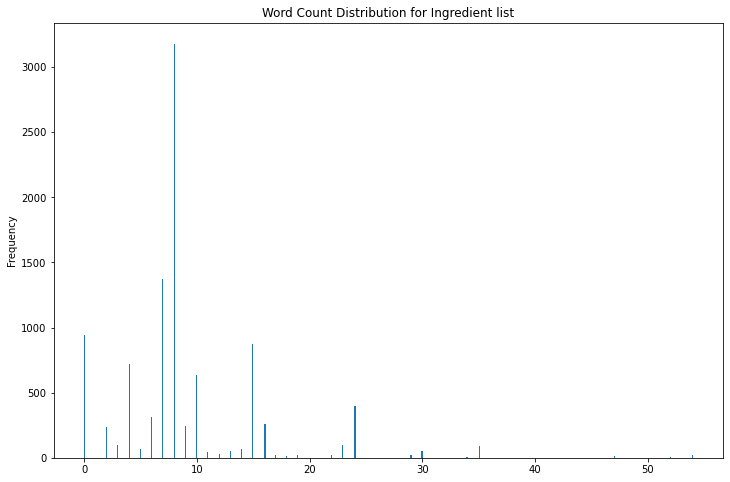

In [98]:
ingredient_df['word_count'] = ingredient_df['ProductIngredientList'].apply(lambda x: len(str(x).split()))# Plotting the word count
ingredient_df['word_count'] .plot(
    kind='hist',
    bins = 500,
    figsize = (12,8),title='Word Count Distribution for Ingredient list');

In [99]:
ingredient_df.drop(ingredient_df[ingredient_df['word_count'] > 10].index,inplace = True)

In [100]:
# def join_words(text):
#     try:
#         text = [word.strip(string.punctuation) for word in text.split(" ")]
#         # remove words that contain numbers
#         text = [word for word in text if not any(c.isdigit() for c in word)]
#         # remove stop words
#         stop=(words + stopwords.words("english"))
#         text = [x for x in text if x not in stop ]
#         # remove empty tokens
#         text = [t for t in text if len(t) > 0]
#         text = "-".join(text)
#     except:
#         pass
#     return text
# ingredient_df['ProductIngredientList'] = ingredient_df['ProductIngredientList'].apply(lambda x: join_words(x))

In [101]:
ingredient_df[ingredient_df['Polarity'].between(0.5,0.8)]

ASIN ProductFlavor_reviews  \
9437    B01HQWQ0M6         Flavor_absent   
9642    B01HQWQ0M6         Flavor_absent   
9678    B01HQWQ0M6         Flavor_absent   
9753    B01HQWQ0M6         Flavor_absent   
9762    B01HQWQ0M6         Flavor_absent   
...            ...                   ...   
788034  B00EZA0BQY         Flavor_absent   
788154  B00EZA0BQY         Flavor_absent   
788230  B00EZA0BQY         Flavor_absent   
788306  B00EZA0BQY         Flavor_absent   
788308  B00EZA0BQY         Flavor_absent   

                                                                                        ReviewContent_Clean  \
9437    nice tea arrived quickly well packaged purchase follow email pleasant well lovely fragrance tast...   
9642    love tea wonderful flavor combination ingredient also mix moringa tea leaf reap benefit definite...   
9678                drank cup good tasting tea every nite say slept like baby....thanks introducing product   
9753                                                ought well soak ball work great make sleepy like minute   
9762                                best tea ever happy slept like baby flavor exactly looking for...thanks   
...                                                                                                     ...   
788034                          surprisingly work well quality sleep good would definitely purchase product   
788154                           taste good work great side effect recommend product problem falling asleep   
788230                                                                           love sleep fast work great   
788306                                                                          helped sleep alittle better   
788308          working well get sleep mode quite happy product cannot add anything work like charm moulton   

                                               ProductIngredientList  \
9437                                         amoda sleep tea organic   
9642                                         amoda sleep tea organic   
9678                                         amoda sleep tea organic   
9753                                         amoda sleep tea organic   
9762                                         amoda sleep tea organic   
...                                                              ...   
788034  chromium melatonin valerian root chamomile flower lemon balm   
788154  chromium melatonin valerian root chamomile flower lemon balm   
788230  chromium melatonin valerian root chamomile flower lemon balm   
788306  chromium melatonin valerian root chamomile flower lemon balm   
788308  chromium melatonin valerian root chamomile flower lemon balm   

        Polarity Sentiment  word_count  
9437         0.5  Positive           4  
9642         0.5  Positive           4  
9678         0.7  Positive           4  
9753         0.8  Positive           4  
9762         0.7  Positive           4  
...          ...       ...         ...  
788034       0.5  Positive           8  
788154       0.8  Positive           8  
788230       0.5  Positive           8  
788306       0.5  Positive           8  
788308       0.8  Positive           8  

[1459 rows x 7 columns]

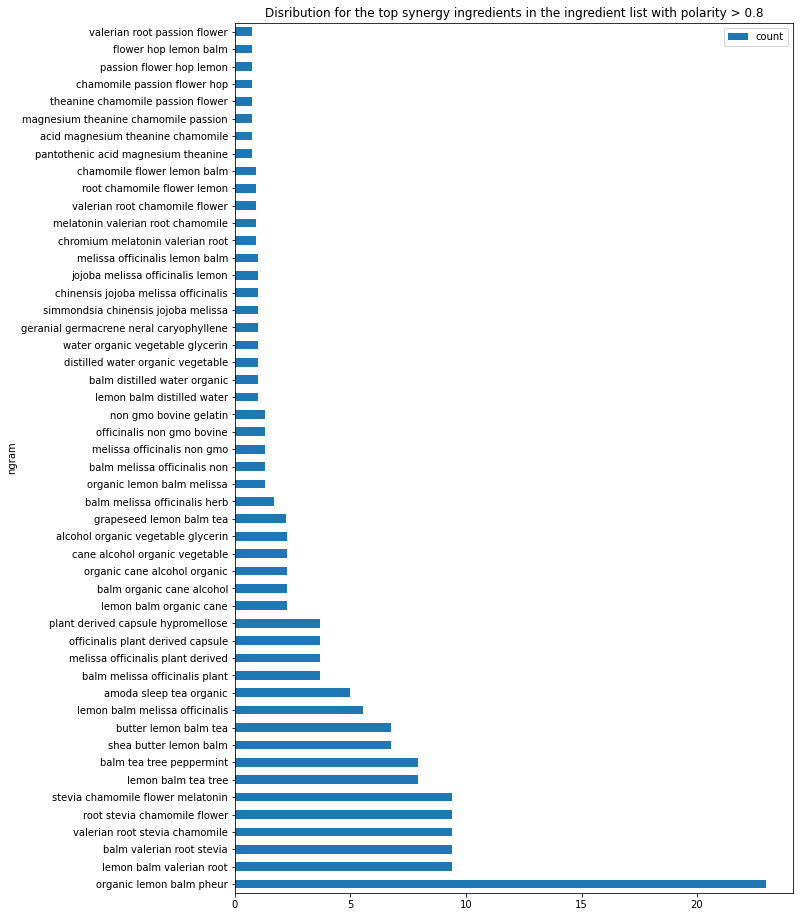

In [102]:
tf = TfidfVectorizer(ngram_range=(4, 4), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(ingredient_df[ingredient_df['Polarity']>0.8 ]['ProductIngredientList'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
ngram = pd.DataFrame(freq)
ngram.rename(columns = {0:'ngram', 1: 'count'}, inplace = True) 
#Taking first 50 records
ngram = ngram.head(50)

#Plotting the ngram distribution
ngram.plot(x ='ngram', y='count', kind = 'barh', title = "Disribution for the top synergy ingredients in the ingredient list with polarity > 0.8", figsize = (10,16), );

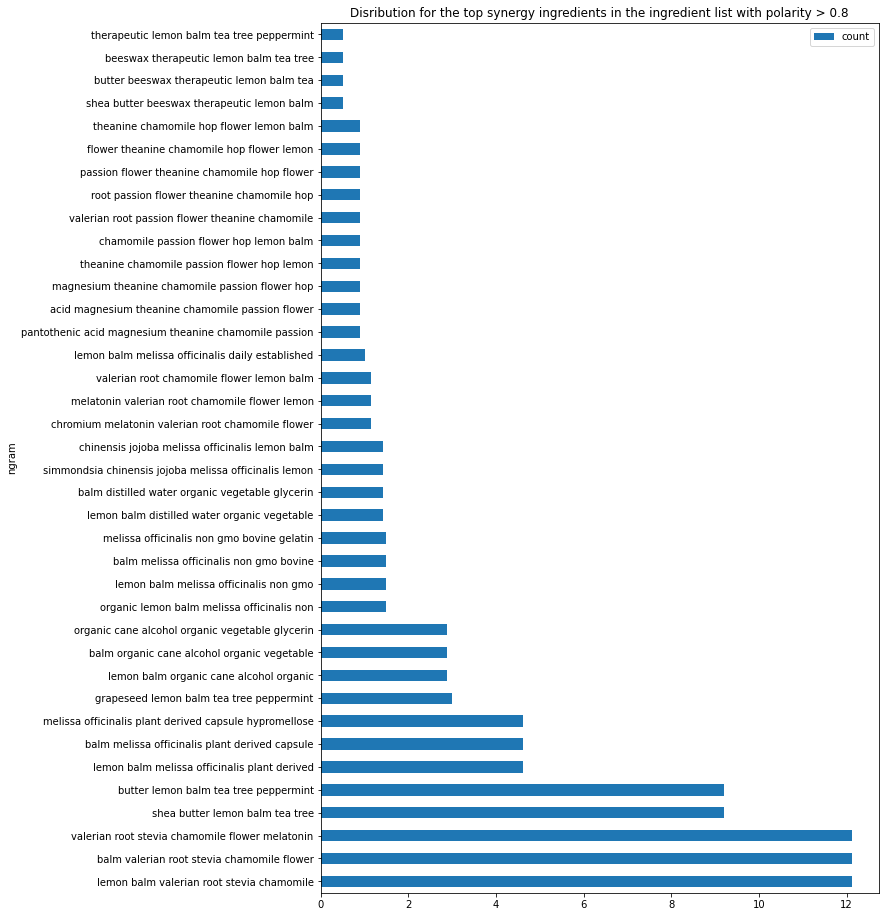

In [103]:
tf = TfidfVectorizer(ngram_range=(6, 6), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(ingredient_df[ingredient_df['Polarity']>0.8]['ProductIngredientList'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
ngram = pd.DataFrame(freq)
ngram.rename(columns = {0:'ngram', 1: 'count'}, inplace = True) 
#Taking first 50 records
ngram = ngram.head(50)

#Plotting the ngram distribution
ngram.plot(x ='ngram', y='count', kind = 'barh', title = "Disribution for the top synergy ingredients in the ingredient list with polarity > 0.8", figsize = (10,16), );

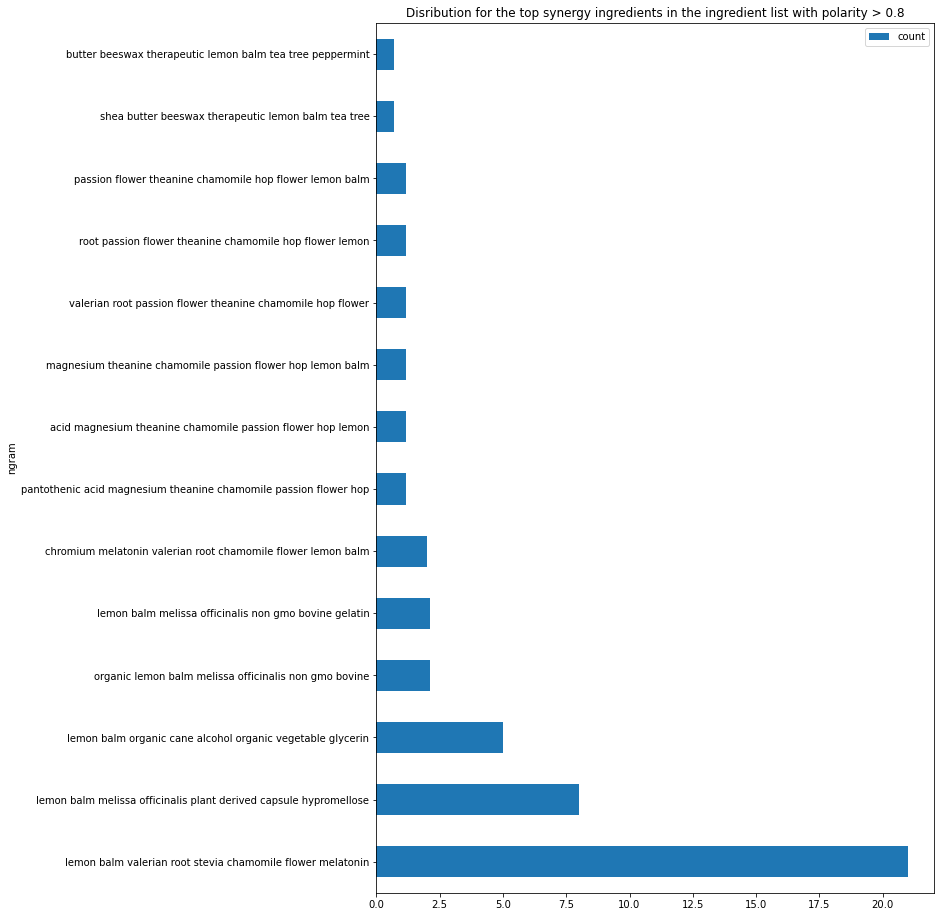

In [104]:
tf = TfidfVectorizer(ngram_range=(8, 8), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(ingredient_df[ingredient_df['Polarity']>0.8]['ProductIngredientList'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
ngram = pd.DataFrame(freq)
ngram.rename(columns = {0:'ngram', 1: 'count'}, inplace = True) 
#Taking first 50 records
ngram = ngram.head(50)

#Plotting the ngram distribution
ngram.plot(x ='ngram', y='count', kind = 'barh', title = "Disribution for the top synergy ingredients in the ingredient list with polarity > 0.8", figsize = (10,16), );

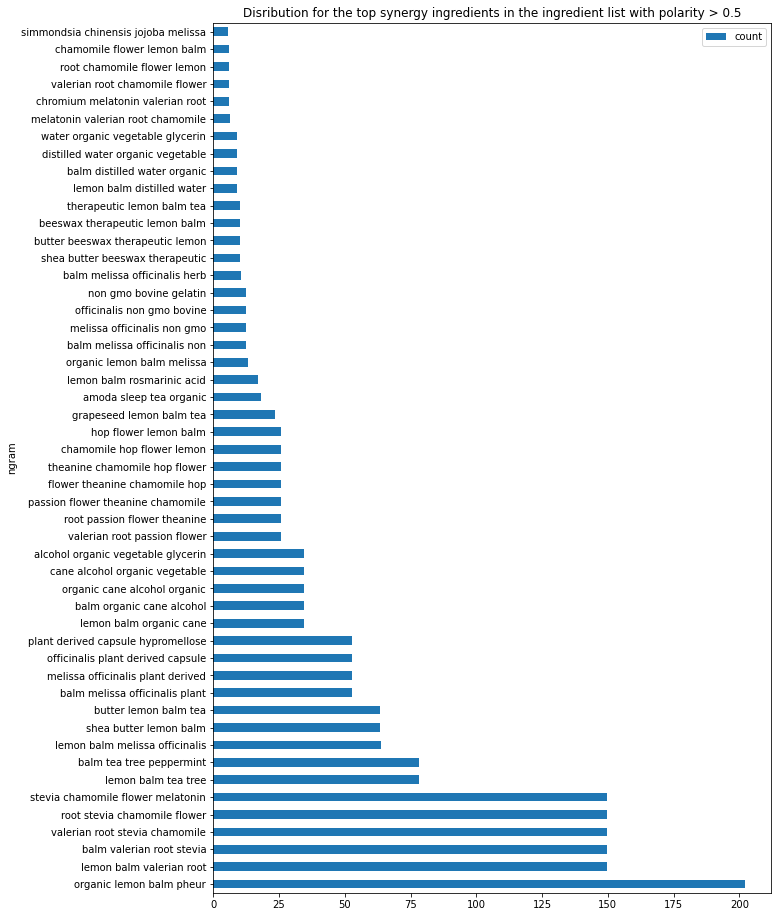

In [108]:
tf = TfidfVectorizer(ngram_range=(4, 4), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(ingredient_df[ingredient_df['Polarity'].between(0.5,0.8)]['ProductIngredientList'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
ngram = pd.DataFrame(freq)
ngram.rename(columns = {0:'ngram', 1: 'count'}, inplace = True) 
#Taking first 50 records
ngram = ngram.head(50)

#Plotting the ngram distribution
ngram.plot(x ='ngram', y='count', kind = 'barh', title = "Disribution for the top synergy ingredients in the ingredient list with polarity > 0.5", figsize = (10,16), );

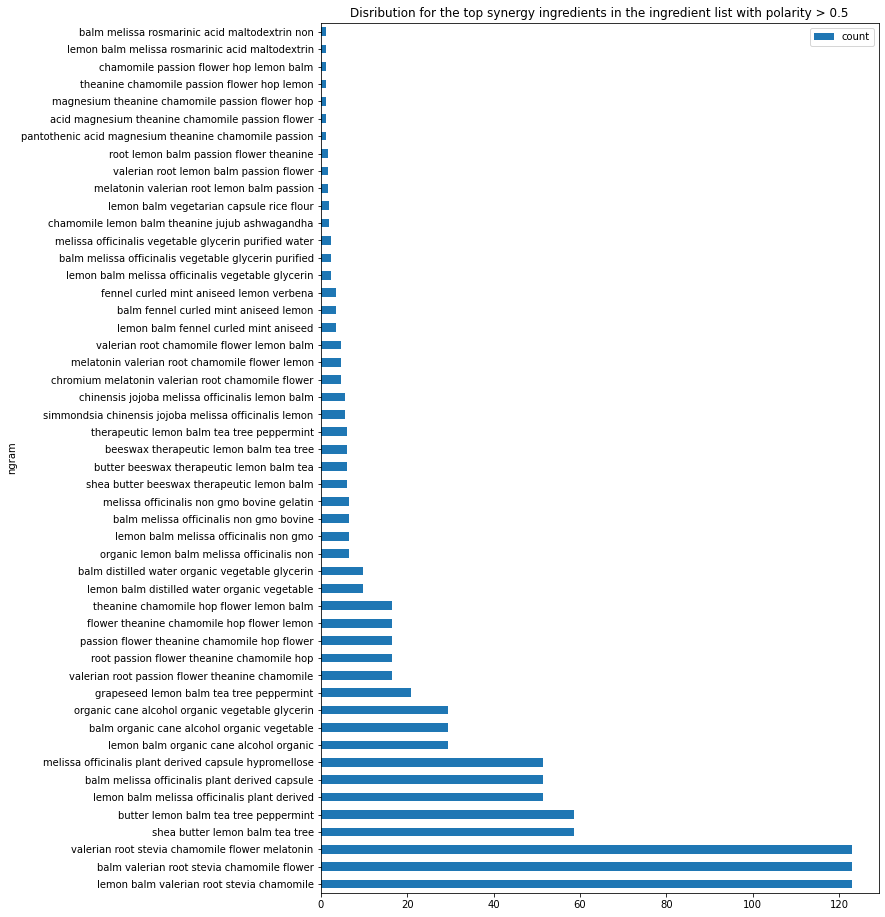

In [109]:
tf = TfidfVectorizer(ngram_range=(6, 6), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(ingredient_df[ingredient_df['Polarity']>0.5]['ProductIngredientList'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
ngram = pd.DataFrame(freq)
ngram.rename(columns = {0:'ngram', 1: 'count'}, inplace = True) 
#Taking first 50 records
ngram = ngram.head(50)

#Plotting the ngram distribution
ngram.plot(x ='ngram', y='count', kind = 'barh', title = "Disribution for the top synergy ingredients in the ingredient list with polarity > 0.5", figsize = (10,16), );

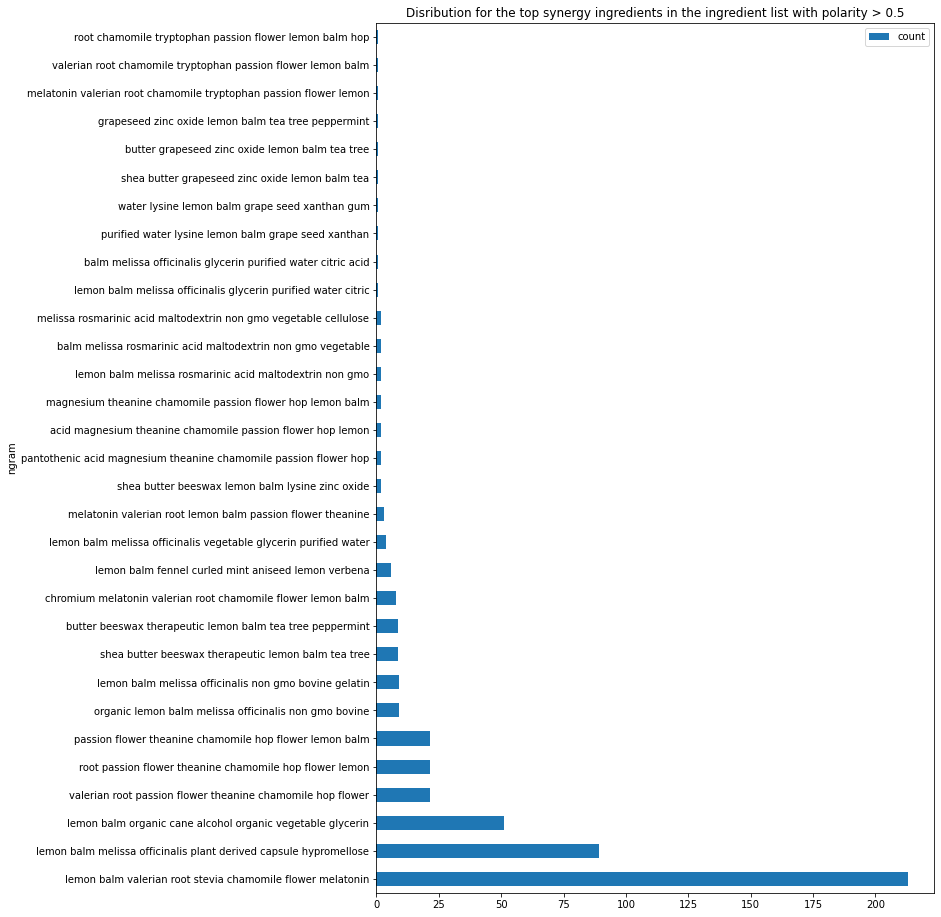

In [110]:
tf = TfidfVectorizer(ngram_range=(8, 8), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(ingredient_df[ingredient_df['Polarity']>0.5]['ProductIngredientList'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
ngram = pd.DataFrame(freq)
ngram.rename(columns = {0:'ngram', 1: 'count'}, inplace = True) 
#Taking first 50 records
ngram = ngram.head(50)

#Plotting the ngram distribution
ngram.plot(x ='ngram', y='count', kind = 'barh', title = "Disribution for the top synergy ingredients in the ingredient list with polarity > 0.5", figsize = (10,16), );

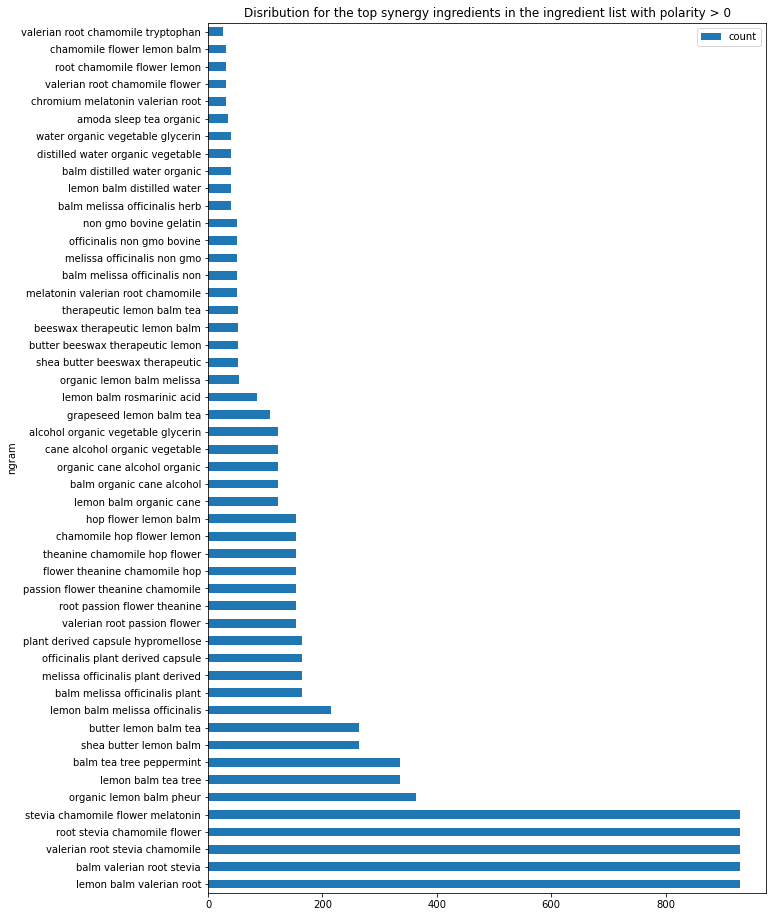

In [111]:
tf = TfidfVectorizer(ngram_range=(4, 4), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(ingredient_df[ingredient_df['Polarity'].between(0,0.5)]['ProductIngredientList'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
ngram = pd.DataFrame(freq)
ngram.rename(columns = {0:'ngram', 1: 'count'}, inplace = True) 
#Taking first 50 records
ngram = ngram.head(50)

#Plotting the ngram distribution
ngram.plot(x ='ngram', y='count', kind = 'barh', title = "Disribution for the top synergy ingredients in the ingredient list with polarity > 0", figsize = (10,16), );

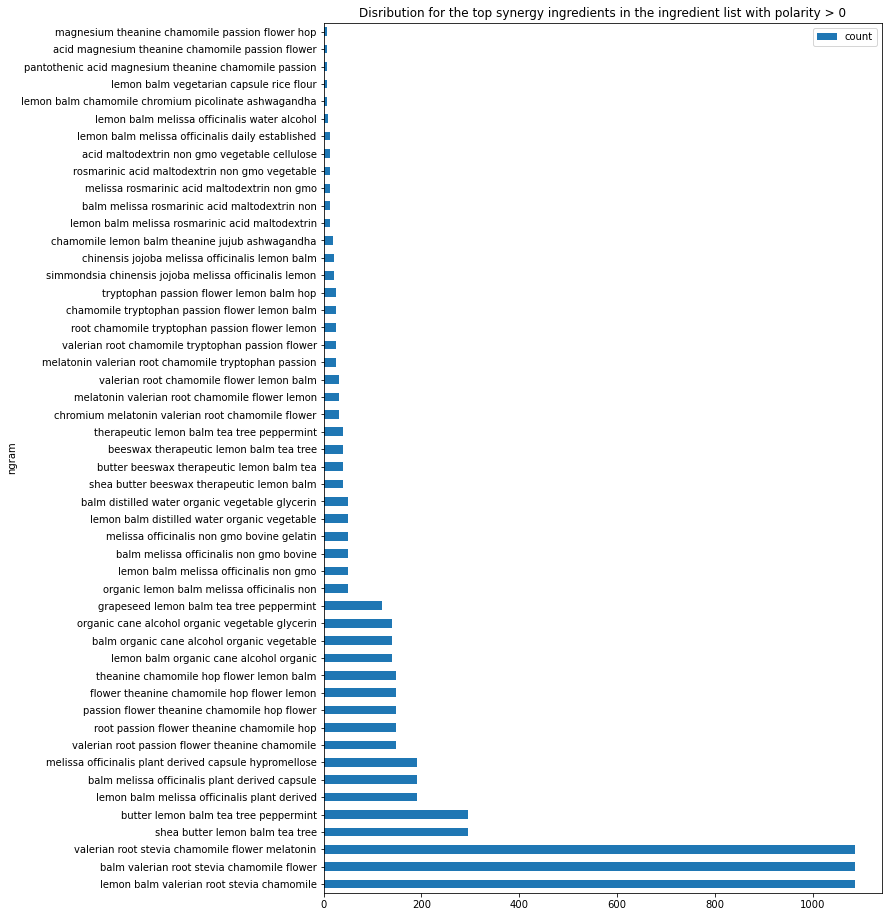

In [112]:
tf = TfidfVectorizer(ngram_range=(6, 6), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(ingredient_df[ingredient_df['Polarity']>0]['ProductIngredientList'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
ngram = pd.DataFrame(freq)
ngram.rename(columns = {0:'ngram', 1: 'count'}, inplace = True) 
#Taking first 50 records
ngram = ngram.head(50)

#Plotting the ngram distribution
ngram.plot(x ='ngram', y='count', kind = 'barh', title = "Disribution for the top synergy ingredients in the ingredient list with polarity > 0", figsize = (10,16), );

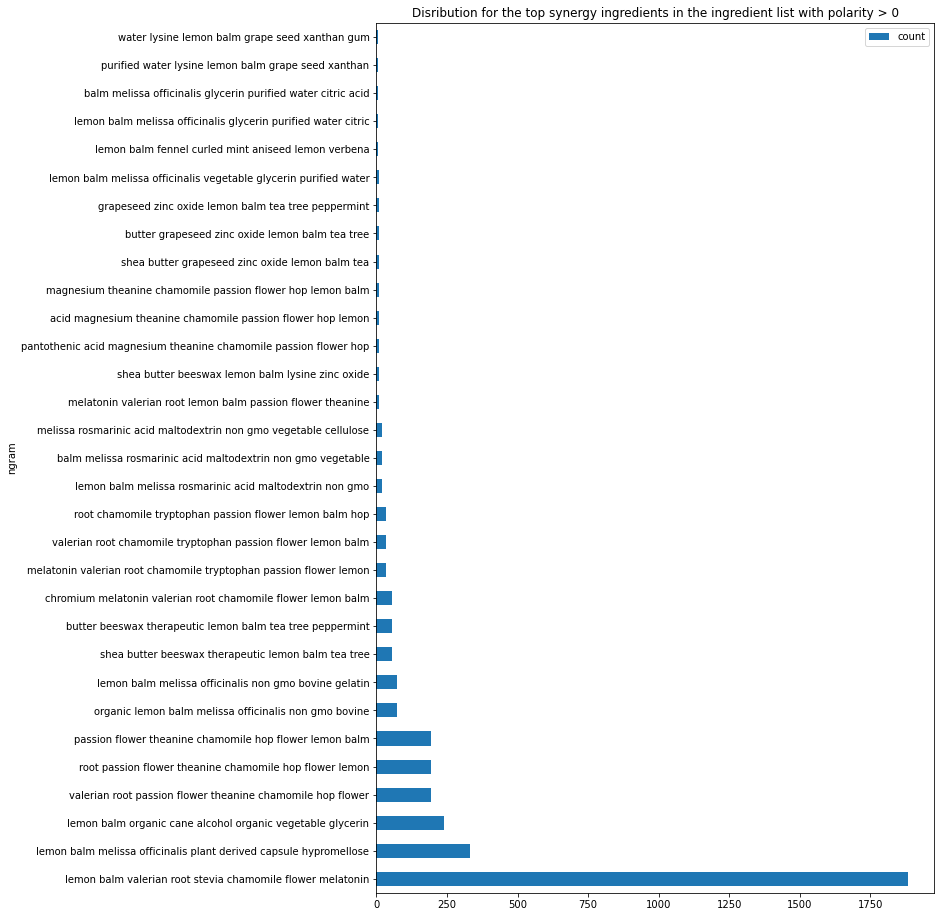

In [113]:
tf = TfidfVectorizer(ngram_range=(8, 8), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(ingredient_df[ingredient_df['Polarity']>0]['ProductIngredientList'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
ngram = pd.DataFrame(freq)
ngram.rename(columns = {0:'ngram', 1: 'count'}, inplace = True) 
#Taking first 50 records
ngram = ngram.head(50)

#Plotting the ngram distribution
ngram.plot(x ='ngram', y='count', kind = 'barh', title = "Disribution for the top synergy ingredients in the ingredient list with polarity > 0", figsize = (10,16), );

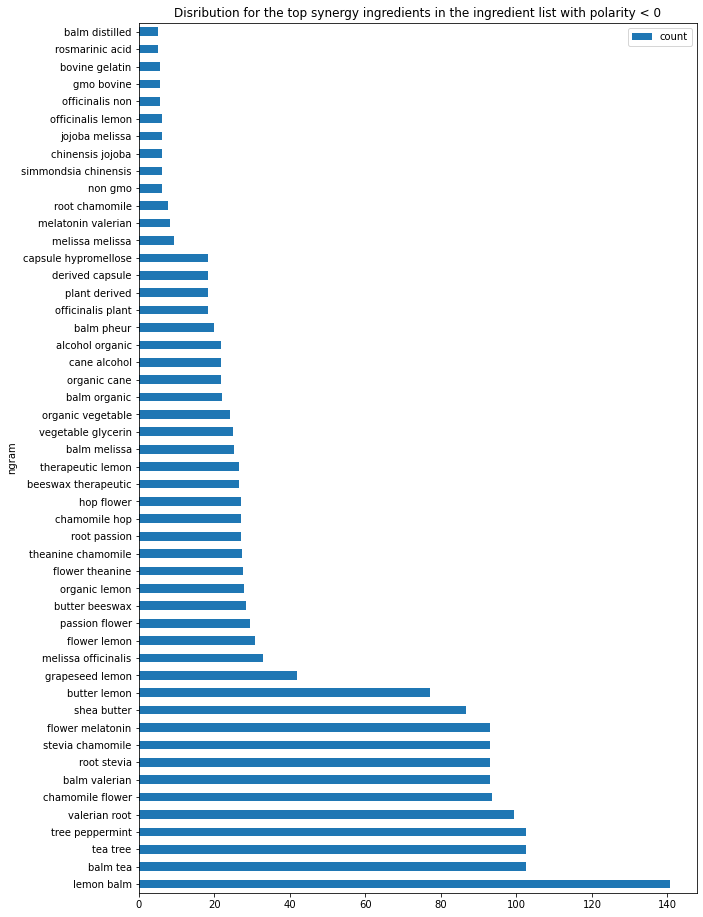

In [114]:
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(ingredient_df[ingredient_df['Polarity']<0]['ProductIngredientList'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
ngram = pd.DataFrame(freq)
ngram.rename(columns = {0:'ngram', 1: 'count'}, inplace = True) 
#Taking first 50 records
ngram = ngram.head(50)

#Plotting the ngram distribution
ngram.plot(x ='ngram', y='count', kind = 'barh', title = "Disribution for the top synergy ingredients in the ingredient list with polarity < 0", figsize = (10,16), );

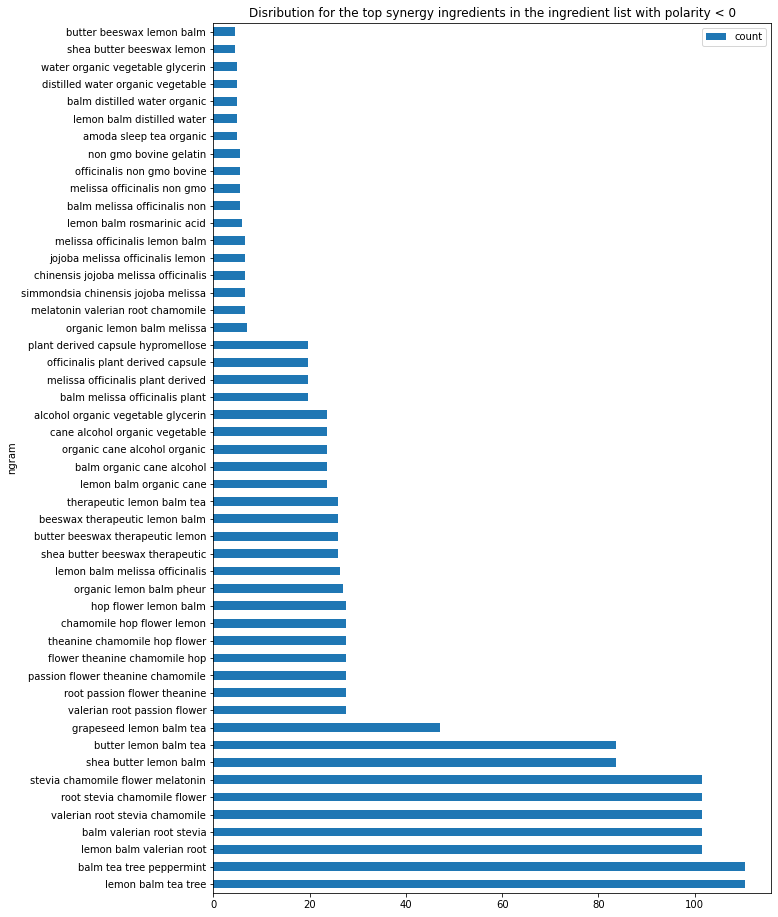

In [115]:
tf = TfidfVectorizer(ngram_range=(4, 4), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(ingredient_df[ingredient_df['Polarity']<0]['ProductIngredientList'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
ngram = pd.DataFrame(freq)
ngram.rename(columns = {0:'ngram', 1: 'count'}, inplace = True) 
#Taking first 50 records
ngram = ngram.head(50)

#Plotting the ngram distribution
ngram.plot(x ='ngram', y='count', kind = 'barh', title = "Disribution for the top synergy ingredients in the ingredient list with polarity < 0", figsize = (10,16), );

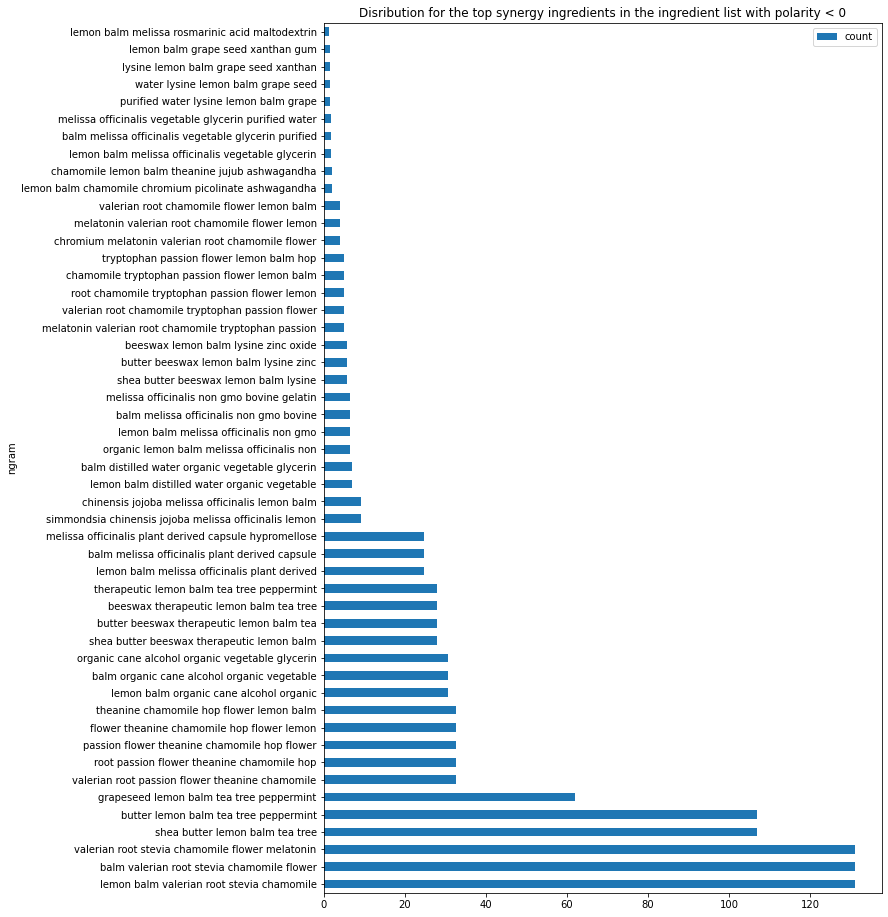

In [116]:
tf = TfidfVectorizer(ngram_range=(6, 6), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(ingredient_df[ingredient_df['Polarity']<0]['ProductIngredientList'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
ngram = pd.DataFrame(freq)
ngram.rename(columns = {0:'ngram', 1: 'count'}, inplace = True) 
#Taking first 50 records
ngram = ngram.head(50)

#Plotting the ngram distribution
ngram.plot(x ='ngram', y='count', kind = 'barh', title = "Disribution for the top synergy ingredients in the ingredient list with polarity < 0", figsize = (10,16), );

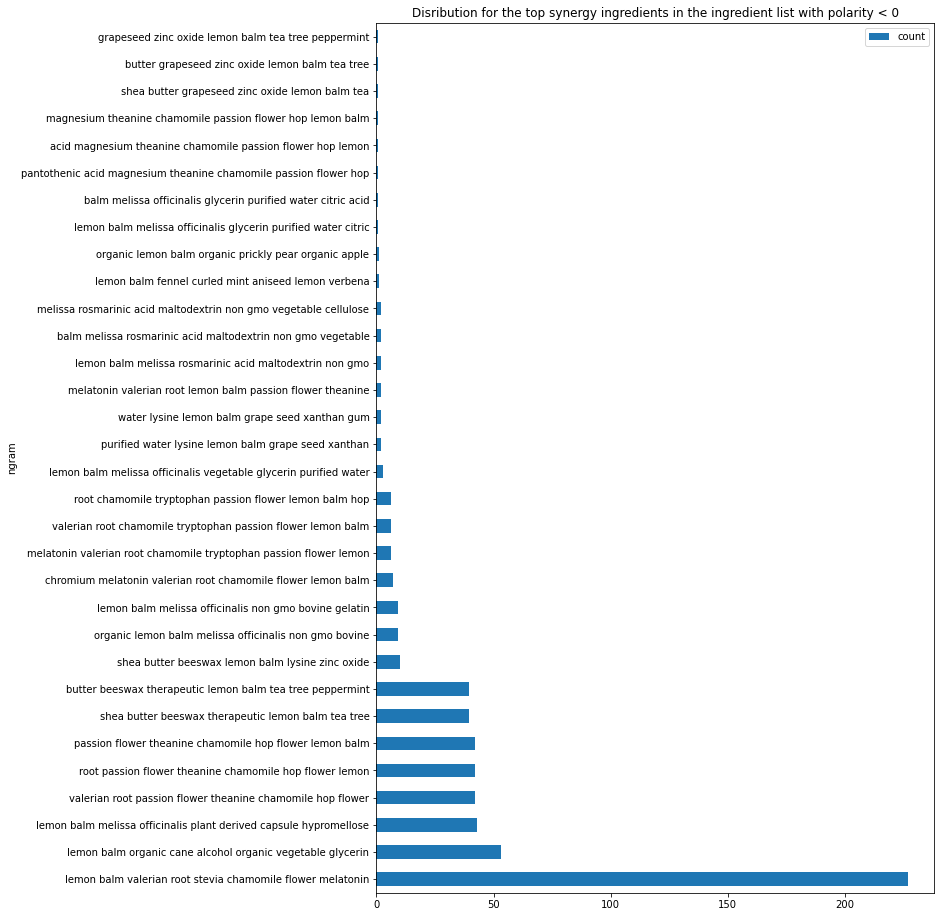

In [117]:
tf = TfidfVectorizer(ngram_range=(8, 8), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(ingredient_df[ingredient_df['Polarity']<0]['ProductIngredientList'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
ngram = pd.DataFrame(freq)
ngram.rename(columns = {0:'ngram', 1: 'count'}, inplace = True) 
#Taking first 50 records
ngram = ngram.head(50)

#Plotting the ngram distribution
ngram.plot(x ='ngram', y='count', kind = 'barh', title = "Disribution for the top synergy ingredients in the ingredient list with polarity < 0", figsize = (10,16), );

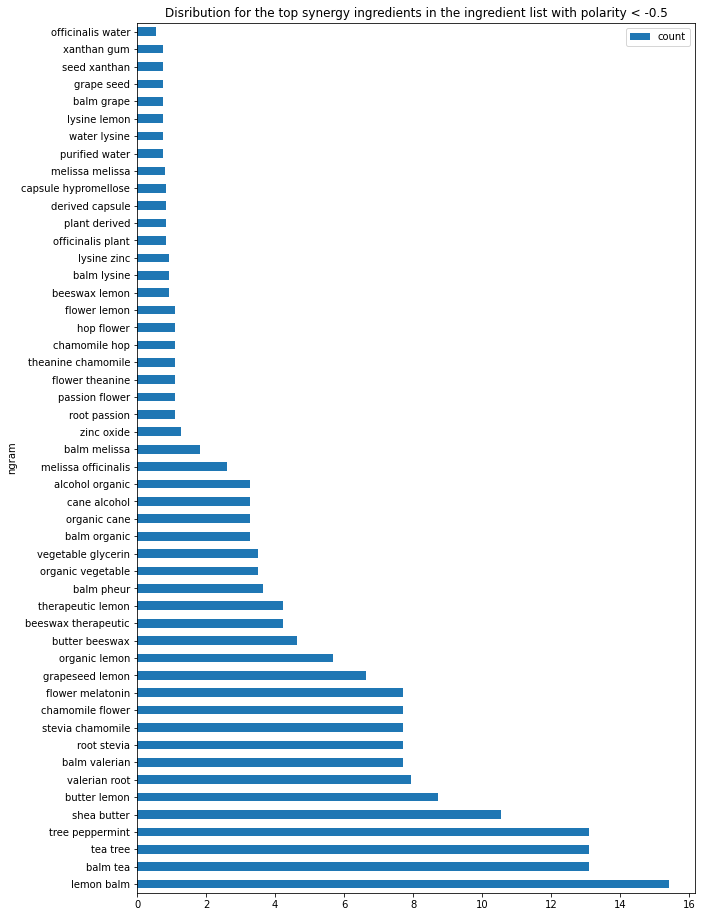

In [118]:
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(ingredient_df[ingredient_df['Polarity']<-0.5]['ProductIngredientList'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
ngram = pd.DataFrame(freq)
ngram.rename(columns = {0:'ngram', 1: 'count'}, inplace = True) 
#Taking first 50 records
ngram = ngram.head(50)

#Plotting the ngram distribution
ngram.plot(x ='ngram', y='count', kind = 'barh', title = "Disribution for the top synergy ingredients in the ingredient list with polarity < -0.5", figsize = (10,16), );

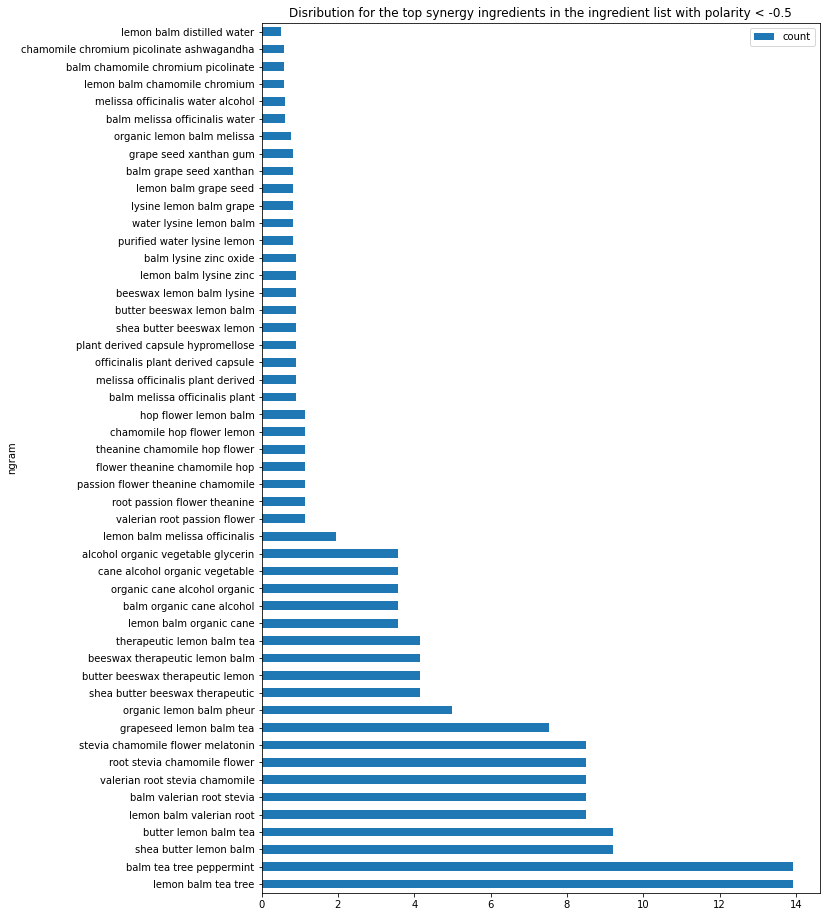

In [119]:
tf = TfidfVectorizer(ngram_range=(4, 4), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(ingredient_df[ingredient_df['Polarity']<-0.5]['ProductIngredientList'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
ngram = pd.DataFrame(freq)
ngram.rename(columns = {0:'ngram', 1: 'count'}, inplace = True) 
#Taking first 50 records
ngram = ngram.head(50)

#Plotting the ngram distribution
ngram.plot(x ='ngram', y='count', kind = 'barh', title = "Disribution for the top synergy ingredients in the ingredient list with polarity < -0.5", figsize = (10,16), );

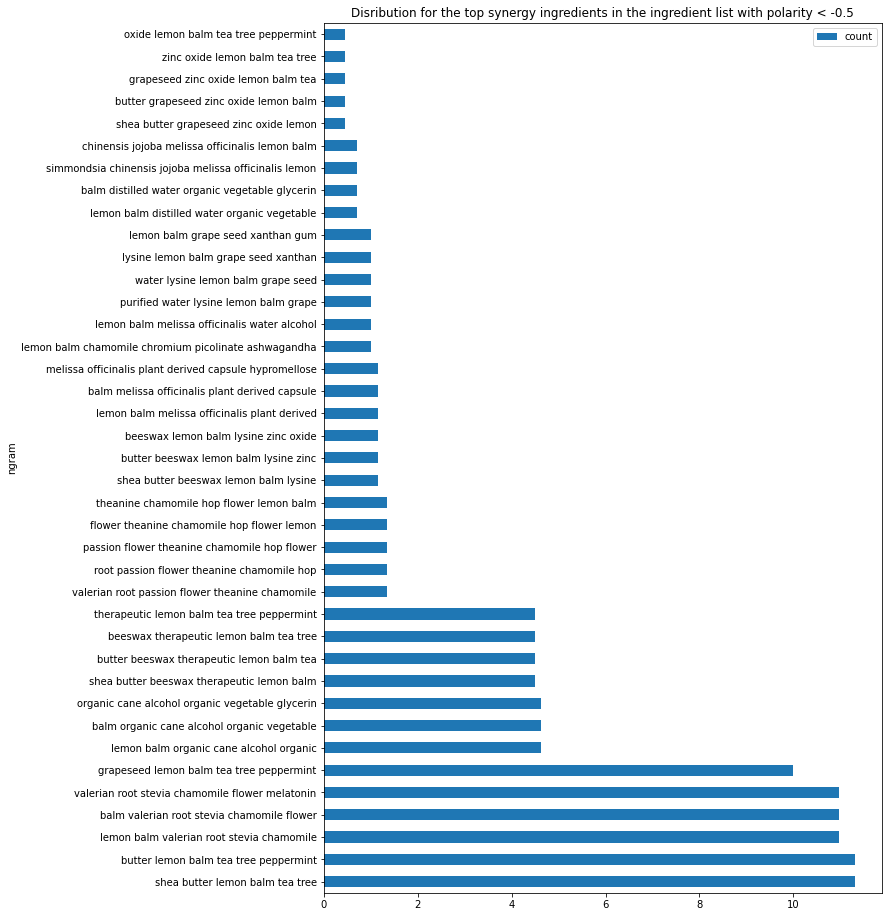

In [120]:
tf = TfidfVectorizer(ngram_range=(6, 6), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(ingredient_df[ingredient_df['Polarity']<-0.5]['ProductIngredientList'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
ngram = pd.DataFrame(freq)
ngram.rename(columns = {0:'ngram', 1: 'count'}, inplace = True) 
#Taking first 50 records
ngram = ngram.head(50)

#Plotting the ngram distribution
ngram.plot(x ='ngram', y='count', kind = 'barh', title = "Disribution for the top synergy ingredients in the ingredient list with polarity < -0.5", figsize = (10,16), );

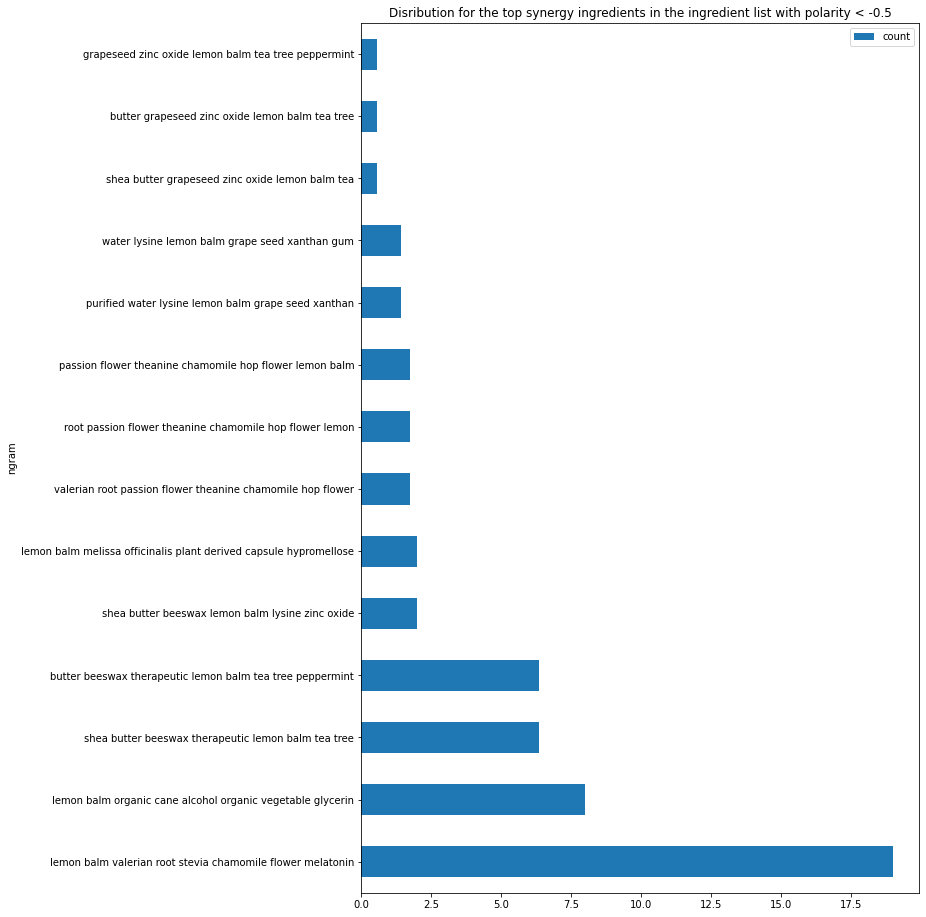

In [121]:
tf = TfidfVectorizer(ngram_range=(8, 8), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(ingredient_df[ingredient_df['Polarity']<-0.5]['ProductIngredientList'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
ngram = pd.DataFrame(freq)
ngram.rename(columns = {0:'ngram', 1: 'count'}, inplace = True) 
#Taking first 50 records
ngram = ngram.head(50)

#Plotting the ngram distribution
ngram.plot(x ='ngram', y='count', kind = 'barh', title = "Disribution for the top synergy ingredients in the ingredient list with polarity < -0.5", figsize = (10,16), );

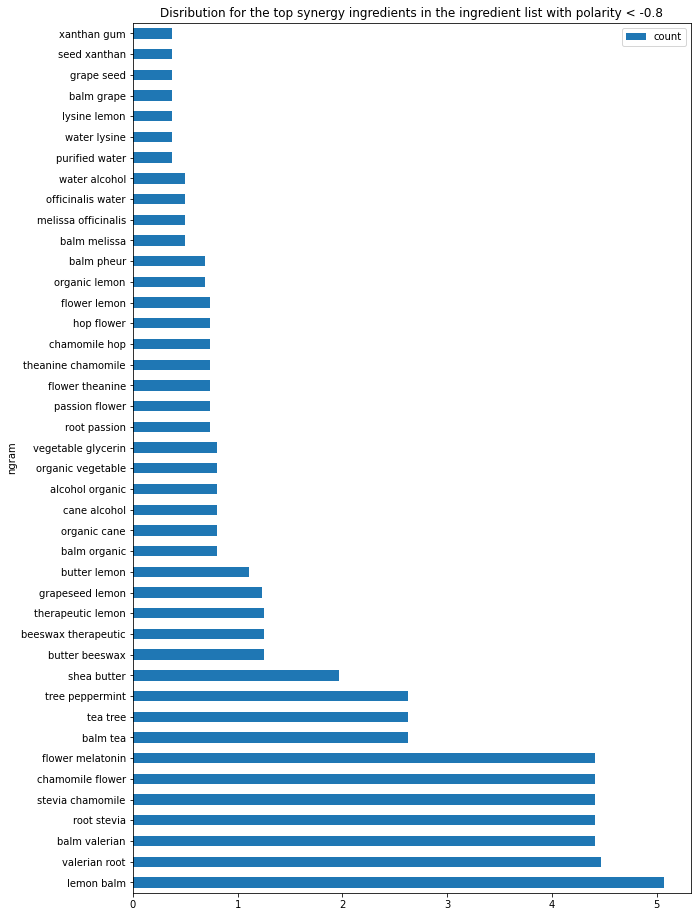

In [122]:
tf = TfidfVectorizer(ngram_range=(2, 2), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(ingredient_df[ingredient_df['Polarity']<-0.8]['ProductIngredientList'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
ngram = pd.DataFrame(freq)
ngram.rename(columns = {0:'ngram', 1: 'count'}, inplace = True) 
#Taking first 50 records
ngram = ngram.head(50)

#Plotting the ngram distribution
ngram.plot(x ='ngram', y='count', kind = 'barh', title = "Disribution for the top synergy ingredients in the ingredient list with polarity < -0.8", figsize = (10,16), );

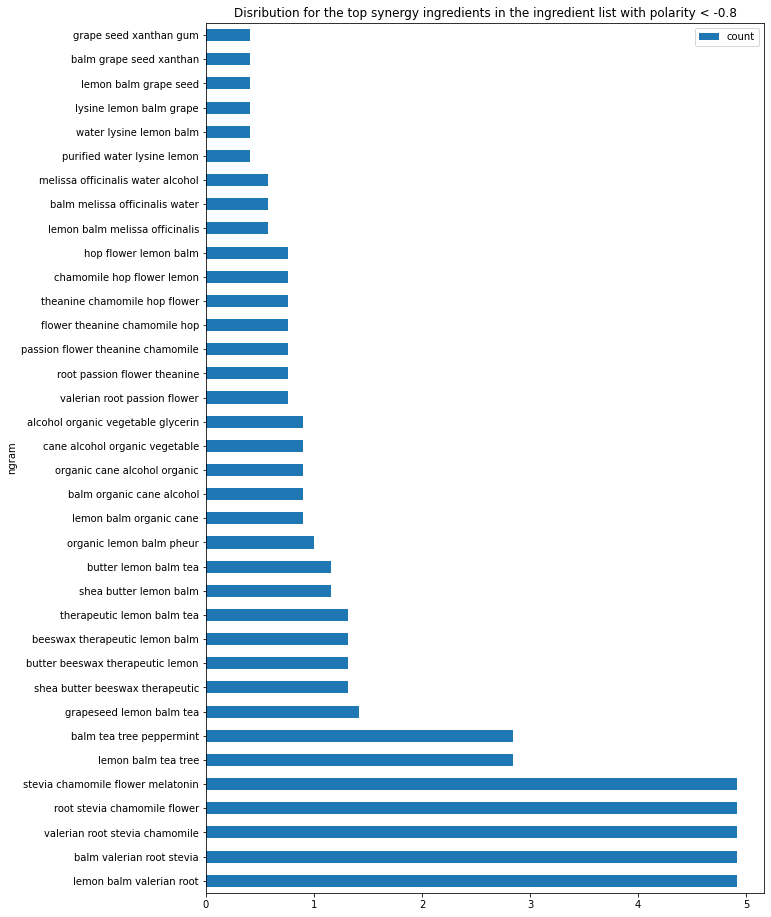

In [123]:
tf = TfidfVectorizer(ngram_range=(4, 4), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(ingredient_df[ingredient_df['Polarity']<-0.8]['ProductIngredientList'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
ngram = pd.DataFrame(freq)
ngram.rename(columns = {0:'ngram', 1: 'count'}, inplace = True) 
#Taking first 50 records
ngram = ngram.head(50)

#Plotting the ngram distribution
ngram.plot(x ='ngram', y='count', kind = 'barh', title = "Disribution for the top synergy ingredients in the ingredient list with polarity < -0.8", figsize = (10,16), );

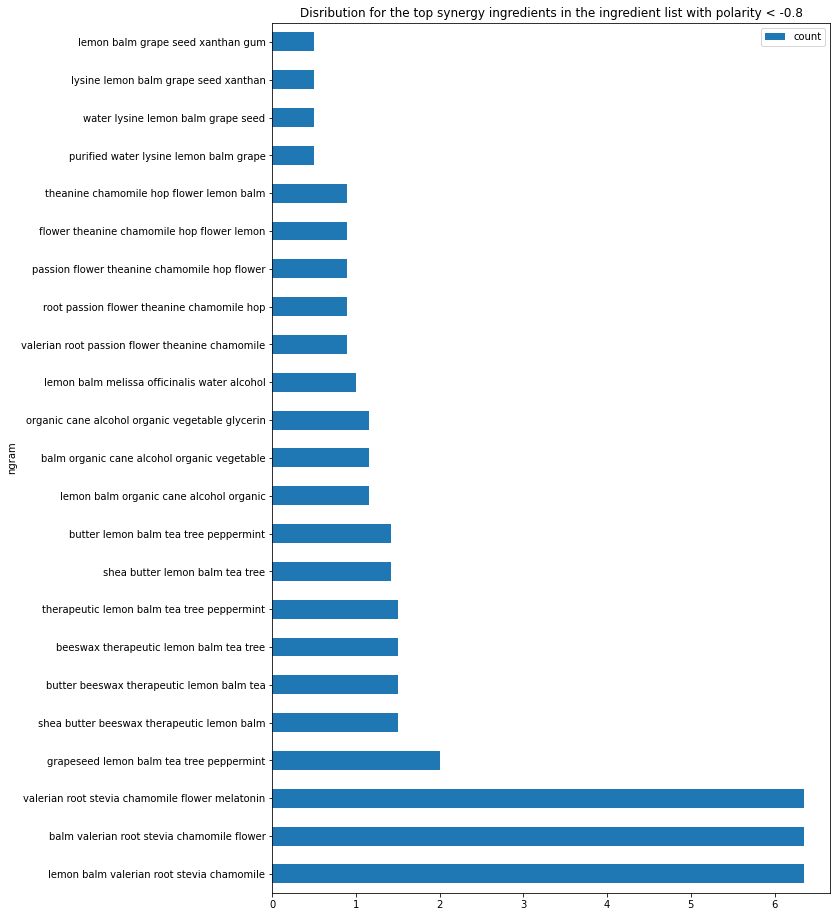

In [124]:
tf = TfidfVectorizer(ngram_range=(6, 6), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(ingredient_df[ingredient_df['Polarity']<-0.8]['ProductIngredientList'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
ngram = pd.DataFrame(freq)
ngram.rename(columns = {0:'ngram', 1: 'count'}, inplace = True) 
#Taking first 50 records
ngram = ngram.head(50)

#Plotting the ngram distribution
ngram.plot(x ='ngram', y='count', kind = 'barh', title = "Disribution for the top synergy ingredients in the ingredient list with polarity < -0.8", figsize = (10,16), );

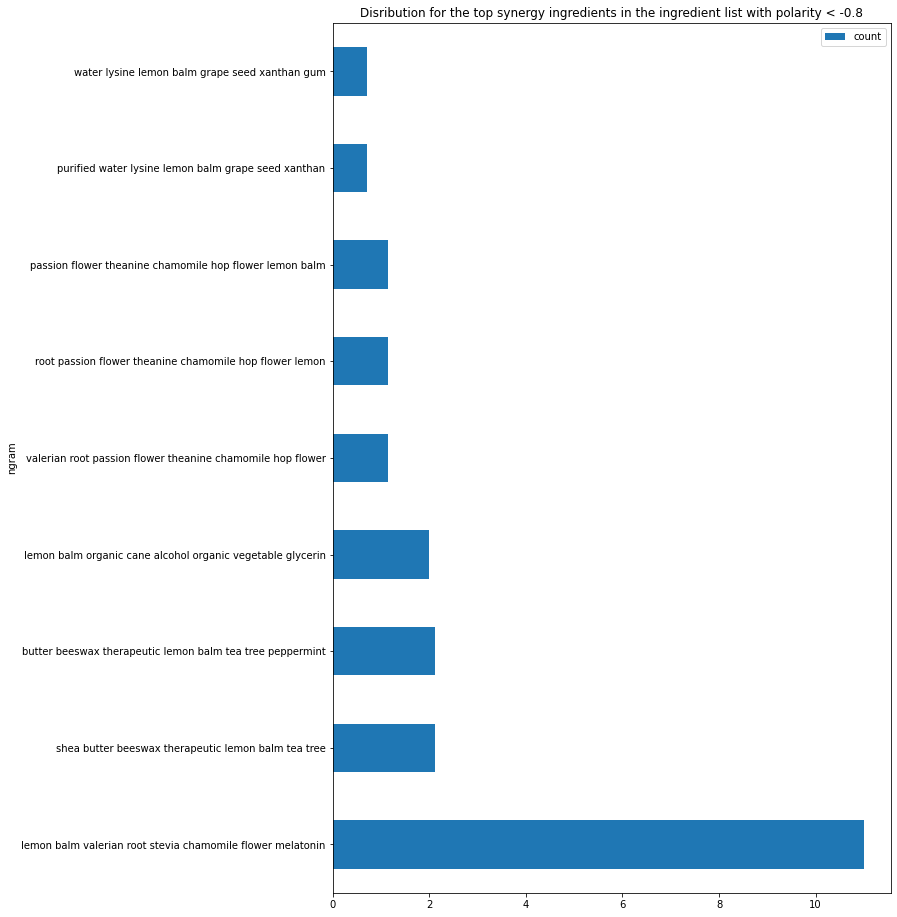

In [125]:
tf = TfidfVectorizer(ngram_range=(8, 8), stop_words='english', lowercase = False)
tfidf_matrix = tf.fit_transform(ingredient_df[ingredient_df['Polarity']<-0.8]['ProductIngredientList'])
total_words = tfidf_matrix.sum(axis=0) 
#Finding the word frequency
freq = [(word, total_words[0, idx]) for word, idx in tf.vocabulary_.items()]
freq =sorted(freq, key = lambda x: x[1], reverse=True)
#converting into dataframe 
ngram = pd.DataFrame(freq)
ngram.rename(columns = {0:'ngram', 1: 'count'}, inplace = True) 
#Taking first 50 records
ngram = ngram.head(50)

#Plotting the ngram distribution
ngram.plot(x ='ngram', y='count', kind = 'barh', title = "Disribution for the top synergy ingredients in the ingredient list with polarity < -0.8", figsize = (10,16), );

In [126]:
ingredient_df

ASIN ProductFlavor_reviews  \
9393    B01HQWQ0M6         Flavor_absent   
9402    B01HQWQ0M6         Flavor_absent   
9410    B01HQWQ0M6         Flavor_absent   
9419    B01HQWQ0M6         Flavor_absent   
9429    B01HQWQ0M6         Flavor_absent   
...            ...                   ...   
788309  B00EZA0BQY         Flavor_absent   
788310  B00EZA0BQY         Flavor_absent   
788312  B00EZA0BQY         Flavor_absent   
788315  B00EZA0BQY         Flavor_absent   
788317  B00EZA0BQY         Flavor_absent   

                                                                                        ReviewContent_Clean  \
9393    drink lot tea pot day wanted something enjoy evening caffeine inspired wonderful review gave sho...   
9402    taste ok well worth slept well year knock allows reading time wake night easier fall back sleep ...   
9410    tea little week time definitely help relax think sleep better terrible problem sleep seems help ...   
9419    bought high hope would help sleep problem difficulty sleeping effect every aspect life wanted ab...   
9429    drink lot loose leaf tea chamomile tea favorite nighttime far best tasting highest quality tea e...   
...                                                                                                     ...   
788309                                                                                     really work good   
788310                                                                             sorry say worked yet day   
788312                                                                                       seem work well   
788315           started taking sleep fast used night's happy far make relaxed mind wonder able fall asleep   
788317                                                                        work quickly taste bad either   

                                               ProductIngredientList  \
9393                                         amoda sleep tea organic   
9402                                         amoda sleep tea organic   
9410                                         amoda sleep tea organic   
9419                                         amoda sleep tea organic   
9429                                         amoda sleep tea organic   
...                                                              ...   
788309  chromium melatonin valerian root chamomile flower lemon balm   
788310  chromium melatonin valerian root chamomile flower lemon balm   
788312  chromium melatonin valerian root chamomile flower lemon balm   
788315  chromium melatonin valerian root chamomile flower lemon balm   
788317  chromium melatonin valerian root chamomile flower lemon balm   

        Polarity Sentiment  word_count  
9393         0.2  Positive           4  
9402         0.3  Positive           4  
9410        -0.0   Neutral           4  
9419         0.0   Neutral           4  
9429         0.3  Positive           4  
...          ...       ...         ...  
788309       0.4  Positive           8  
788310      -0.5  Negative           8  
788312       0.0   Neutral           8  
788315       0.4  Positive           8  
788317      -0.2  Negative           8  

[7821 rows x 7 columns]

In [127]:
pd.set_option('display.max_row',50)
pd.set_option('display.max_colwidth',100)

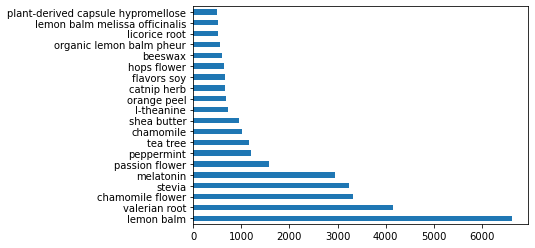

<Figure size 1728x576 with 0 Axes>

In [128]:
ingredient_list_df['ProductIngredientList'].value_counts().sort_values(ascending= False)[:20].plot(kind='barh')
plt.figure(figsize=[24,8]);

In [129]:
ingredient_list_df['ProductIngredientList'].nunique()

267

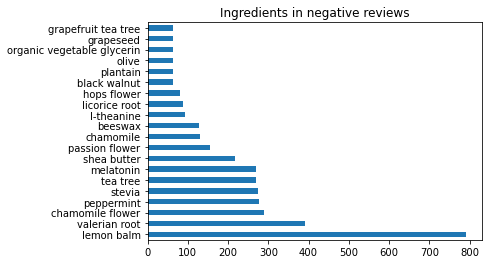

In [130]:
ingredient_list_df[ingredient_list_df['Polarity']<0]['ProductIngredientList'].value_counts().sort_values(ascending=False)[:20].plot(kind='barh');
plt.title('Ingredients in negative reviews');

Text(0.5, 1.0, 'Ingredients in positive reviews')

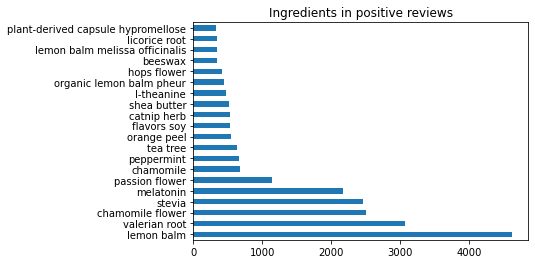

In [131]:
ingredient_list_df[ingredient_list_df['Polarity']>0]['ProductIngredientList'].value_counts()[:20].plot(kind='barh');
plt.title('Ingredients in positive reviews')

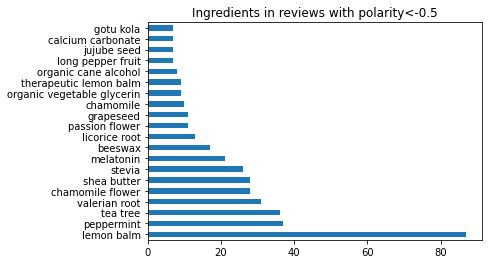

In [132]:
ingredient_list_df[ingredient_list_df['Polarity']<-0.5]['ProductIngredientList'].value_counts().sort_values(ascending=False)[:20].plot(kind='barh');
plt.title('Ingredients in reviews with polarity<-0.5');

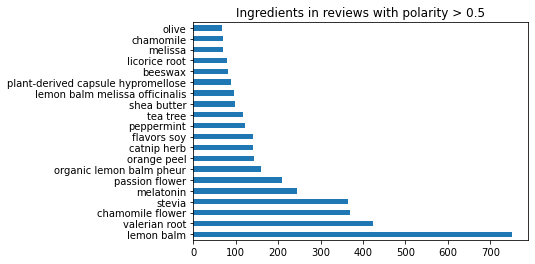

In [133]:
ingredient_list_df[ingredient_list_df['Polarity']>0.5]['ProductIngredientList'].value_counts().sort_values(ascending=False)[:20].plot(kind='barh');
plt.title('Ingredients in reviews with polarity > 0.5');

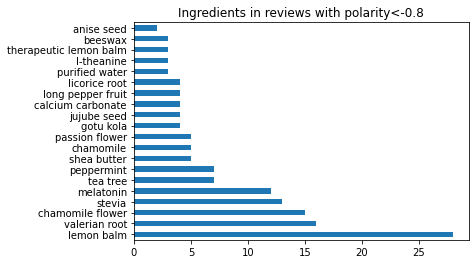

In [134]:
ingredient_list_df[ingredient_list_df['Polarity']<-0.8]['ProductIngredientList'].value_counts().sort_values(ascending=False)[:20].plot(kind='barh');
plt.title('Ingredients in reviews with polarity<-0.8');

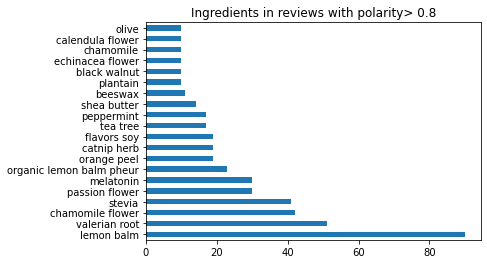

In [135]:
ingredient_list_df[ingredient_list_df['Polarity']>0.8]['ProductIngredientList'].value_counts().sort_values(ascending=False)[:20].plot(kind='barh');
plt.title('Ingredients in reviews with polarity> 0.8');

In [136]:
ingredient_list_df['ProductIngredientList'].nunique()

267

In [137]:
pos_list=ingredient_list_df[ingredient_list_df['Polarity']>0]['ProductIngredientList'].unique().tolist()
ingredient_list_df[ingredient_list_df['Polarity']>0]['ProductIngredientList'].nunique()

259

In [138]:
neg_list=ingredient_list_df[ingredient_list_df['Polarity']<0]['ProductIngredientList'].unique().tolist()
ingredient_list_df[ingredient_list_df['Polarity']<0]['ProductIngredientList'].nunique()

239

In [139]:
pos_diff=np.setdiff1d(pos_list,neg_list,assume_unique=True)
pos_diff

array(['mint', 'rosehip', 'fennel fruit', 'hibiscus', 'lavender',
       'hawthorn fruit', 'hawthorn flower', 'lemongrass',
       'common hop cone', 'organic melissae folium', 'organic rooibos',
       'lemon myrtle bachousia citriodora', 'rhodiola root',
       'extracts chamomile', 'lemon balm hops', 'rosemary', 'ginkgo',
       'vegetarian capsule', 'rice flour', 'melissa officinalis l',
       'organic lemon balm melissa officinalis dried',
       'organic valerian valeriana officinalis dried root',
       "organic saint john's wort hypericum perforatum dried herb",
       'organic cane sugar', 'organic tapioca syrup',
       'black elderberry juice', 'organic tapioca starch'], dtype='<U162')

In [140]:
diff=np.setdiff1d(neg_list,pos_list,assume_unique=True)
diff

array(['toronjil lemon balm melissa officinalis', 'evaporated cane juice',
       'jerusalem artichoke', 'lemon balm flower', 'ashwagandha root',
       'organic prickly pear', 'organic apple'], dtype='<U162')

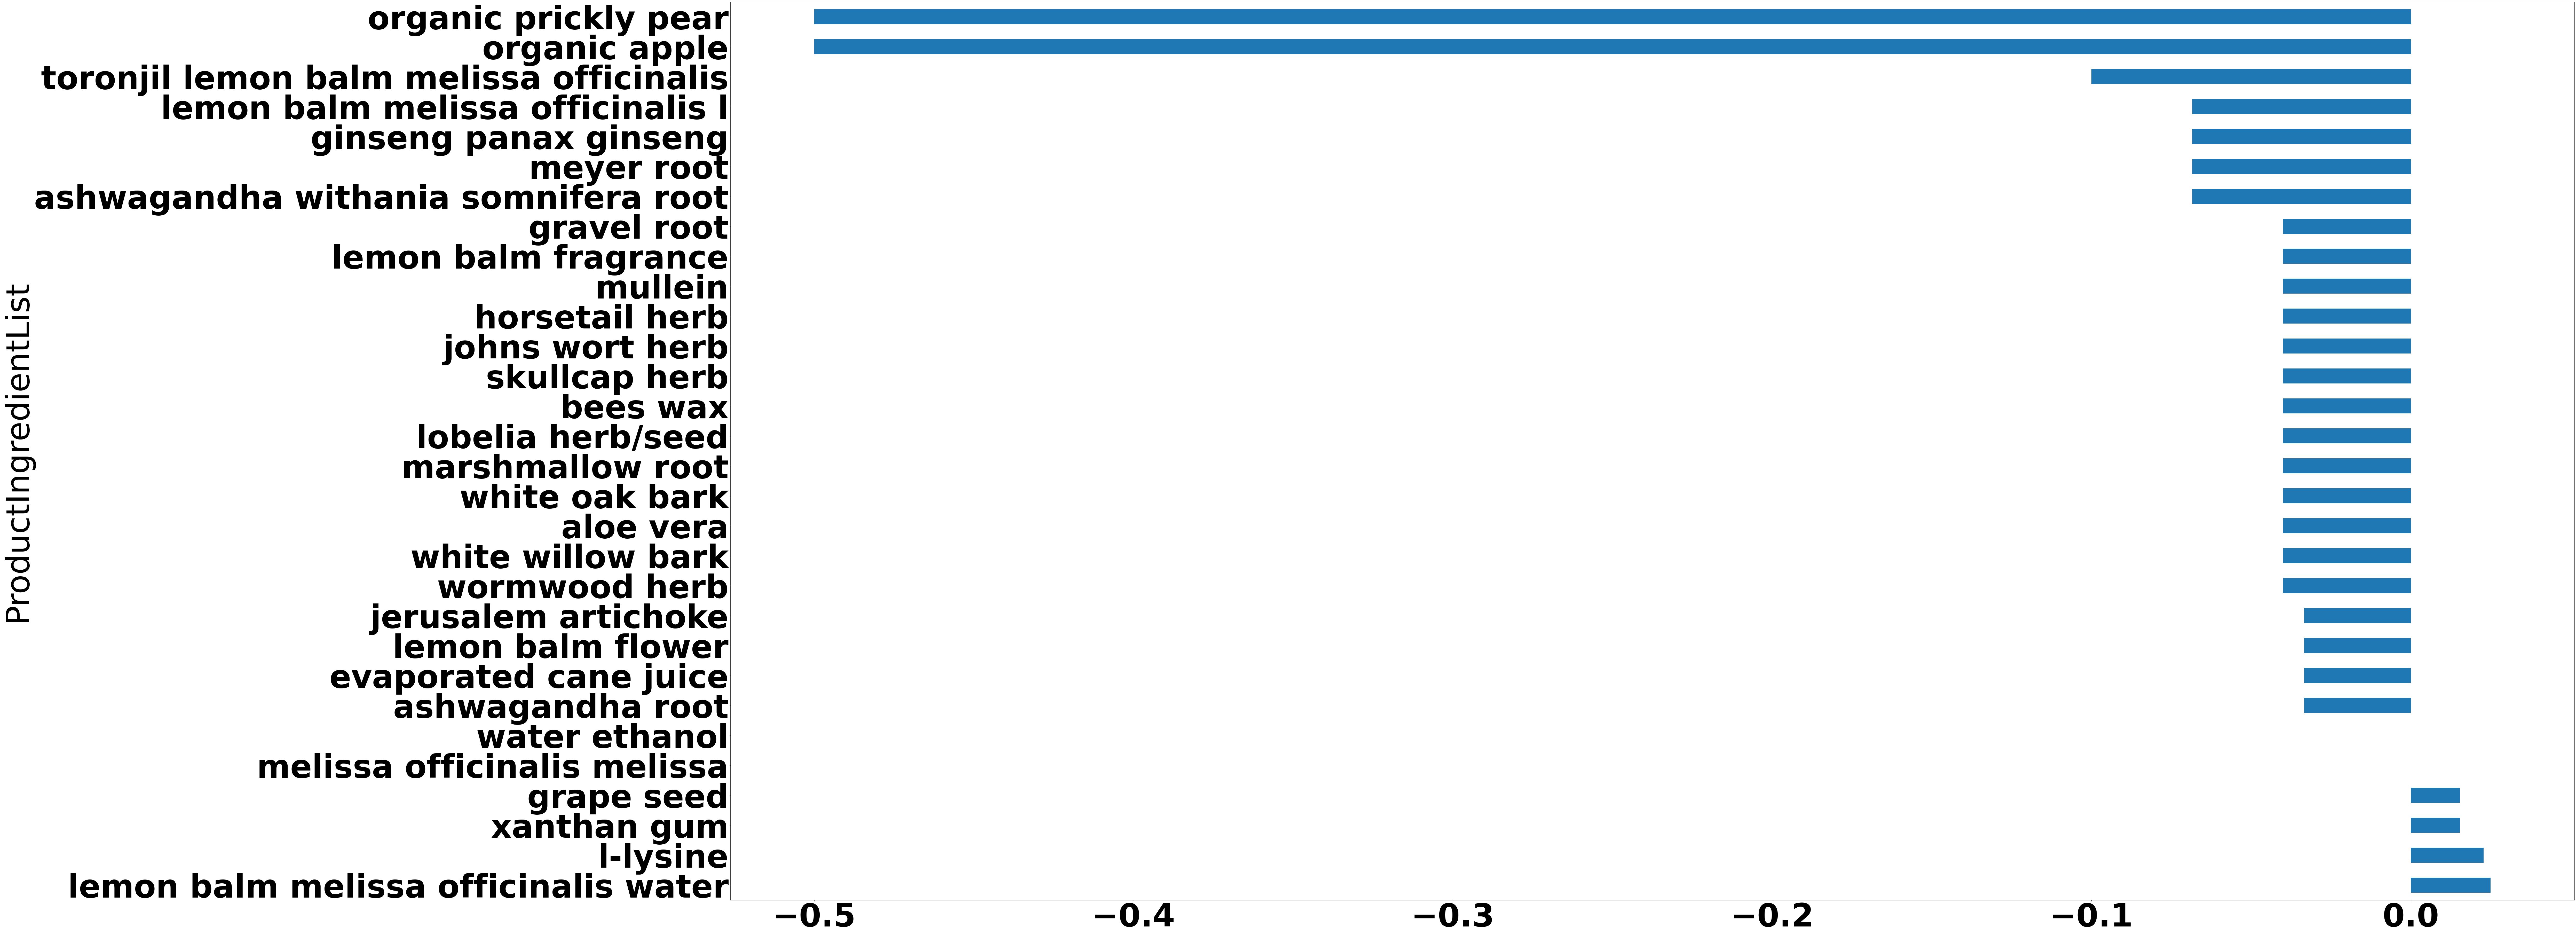

In [141]:
from matplotlib.pyplot import figure
import matplotlib
matplotlib.rcParams.update({'font.size': 124, 'font.weight': 'bold'})
figure(figsize=(128,64))
ingredient_list_df.groupby('ProductIngredientList')['Polarity'].mean().sort_values(ascending=False).tail(30).plot(kind='barh');

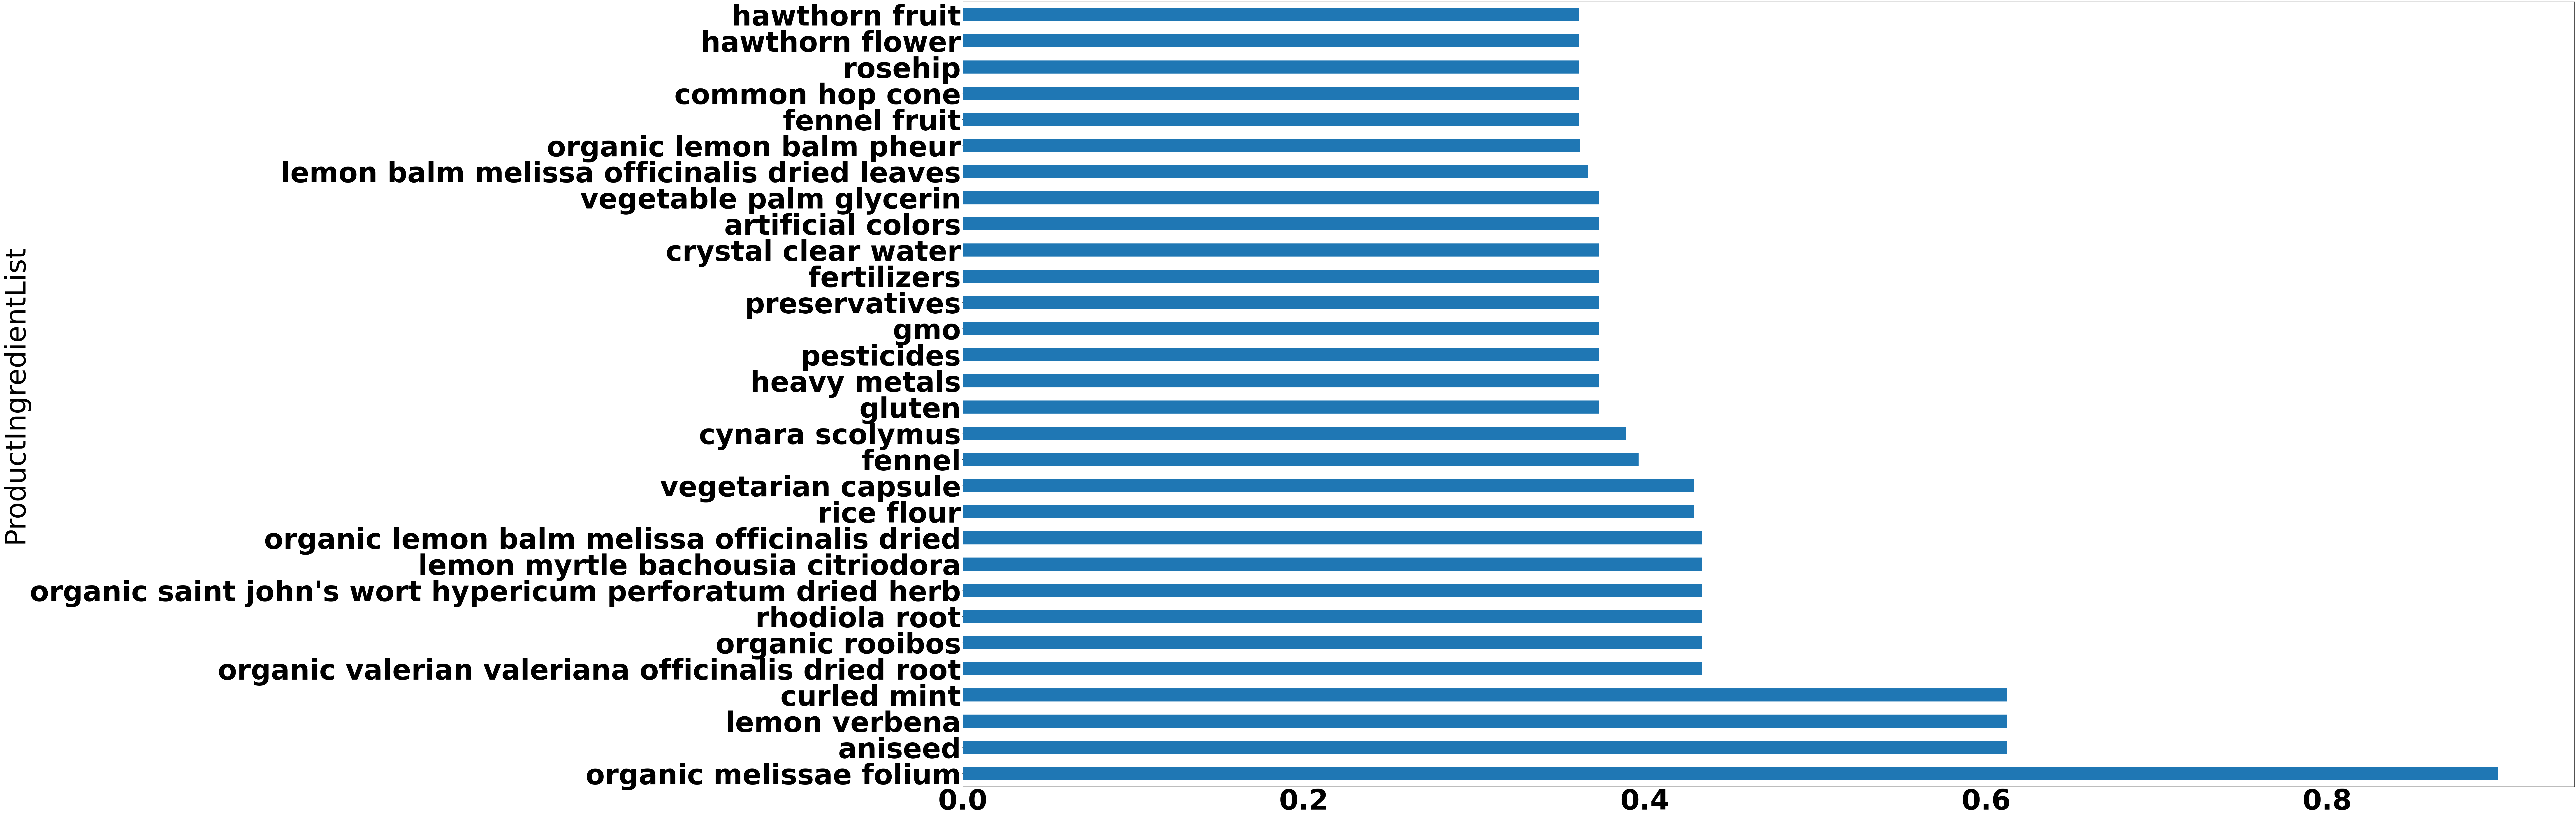

In [142]:
from matplotlib.pyplot import figure
import matplotlib
matplotlib.rcParams.update({'font.size': 124, 'font.weight': 'bold'})
figure(figsize=(128,64))
ingredient_list_df.groupby('ProductIngredientList')['Polarity'].mean().sort_values(ascending=False).head(30).plot(kind='barh');